## **Section 1: Introduction and Summary**

This notebook intends to analyze, compare, and provide insights on the performance of two fundamentally different approaches to **portfolio risk modelling and risk-adjusted portfolio construction**:

- One **machine-learning–based risk modelling framework**, and  
- One **Monte Carlo simulation–based risk modelling framework**.

The comparison is conducted across the following dimensions:

**1. Risk Capture and Sensitivity:**  
How effectively each approach captures volatility dynamics, downside risk, tail behavior, and regime-dependent uncertainty embedded in historical return series.

**2. Stability of Risk Estimates:**  
The robustness and consistency of estimated risk inputs—particularly volatility and covariance—under evolving market conditions and across rebalancing windows.

**3. Portfolio Construction and Rebalancing Outcomes:**  
How differences in risk estimation propagate into portfolio weights, diversification properties, and realized risk-adjusted performance over time.

Based on the findings above, this notebook aims to determine **Model Applicability**—that is, which framework is better suited for **risk estimation, portfolio optimization support, and stress-aware decision making**, rather than return forecasting.

Additionally, the notebook explains the underlying mechanics—both mathematically and intuitively—of each approach, enabling a clear understanding of how uncertainty is modelled and translated into portfolio decisions.

---

**Dataset Description**

The analysis uses **daily closing price data** spanning approximately **2001–2026**, covering multiple market regimes including the Global Financial Crisis (2008), the COVID-19 shock (2020), and the post-pandemic monetary tightening cycle.

The asset universe is intentionally restricted to three broad instruments to emphasize **diversification, correlation structure, and regime behavior**, rather than security-selection alpha:

1. **NIFTY 50 Index** – proxy for broad Indian equity market exposure (sourced from Zerodha using Kite API)
2. **NIFTY Bank Index** – proxy for cyclical, leverage-sensitive financial equities (sourced from Zerodha using Kite API)
3. **Gold** – proxy for defensive and inflation-hedging behavior (sourced from Yahoo Finance - COMEX Gold Futures - CMEGroup - GC=F)

Daily prices are transformed into **logarithmic returns**, which form the foundational input for all subsequent modelling stages. Log returns ensure time-additivity, scale consistency, and comparability across assets with heterogeneous price levels.

---

**Analytical Objective**

Unlike return-forecasting exercises, this notebook focuses explicitly on **risk estimation and portfolio behavior**.

The primary objectives are to:

- Estimate asset-level and portfolio-level risk under different modelling paradigms  
- Construct portfolios using a **fixed, risk-adjusted optimization rule**  
- Evaluate how alternative risk models influence:
  - Estimated volatility and covariance structure  
  - Optimal portfolio weights  
  - Realized post-rebalancing performance  

Importantly, the notebook does **not** attempt to predict future prices or returns directly. Instead, it evaluates how different risk-modelling philosophies interpret uncertainty and how that uncertainty affects portfolio outcomes.

---

**Modelling Approach**

Two distinct and complementary modelling frameworks are implemented.

*Monte Carlo Risk Modelling*

The Monte Carlo framework represents a **distribution-based, probabilistic approach** to risk estimation. Using historical return data, the model:

- Estimates expected returns and covariance structure  
- Simulates a large number of potential future return paths  
- Aggregates simulated outcomes to infer portfolio-level risk measures  

This approach explicitly models **distributional uncertainty** and is particularly well-suited for understanding tail risk and scenario dispersion.

*Machine Learning Risk Modelling*

The machine learning framework treats **risk as a conditional, learnable function of historical return dynamics**. Rather than assuming a fixed parametric distribution, the model infers patterns such as:

- Volatility clustering  
- Non-linear dependencies  
- Regime-dependent behavior  

Engineered features encode memory, dispersion, and drawdown effects observed in financial time series. Model outputs are used to generate **forward-looking volatility estimates**, which feed directly into portfolio construction.

---

**Portfolio Construction and Evaluation**

Portfolio construction is governed by a **single, fixed decision rule** applied consistently across both modelling approaches.

- **Risk-adjusted return metric:** Sharpe ratio  
- **Optimization objective:** Maximize Sharpe ratio  
- **Constraints:**  
  - Long-only  
  - Fully invested  

By comparing **pre- and post-rebalancing portfolios under each risk model and portfolio construction rule**, the notebook highlights how **model choice alone can materially alter portfolio behavior—even when using the same underlying assets**.

Evaluation focuses on:

- Portfolio volatility  
- **Risk-adjusted return metrics: Sharpe**  
- Drawdown and tail-risk characteristics  
- Stability of portfolio weights and turnover

---

**Project Methodology**

The empirical analysis follows a structured, walk-forward research design to ensure methodological rigor and avoid look-ahead bias.

*Step 1: Data Collection and Cleansing*

Three independent price series are sourced:

- NIFTY 50 prices  
- NIFTY Bank prices  
- Gold price proxy  

All datasets are:

- Cleaned for missing observations  
- Aligned to a common date range  
- Prepared to ensure consistency across assets

*Step 2: Computation of Daily Log Returns*

For each asset:

- Daily log returns are computed  
- This return series constitutes the **only shared input across all models**  

All downstream modelling—Monte Carlo and ML—is built exclusively on this return representation.

*Step 3: Feature Engineering (Asset-Specific)*

For each asset independently, the following features are engineered:

- Rolling volatility estimates (20-day, 60-day)  
- Lagged return terms  
- Rolling mean returns  
- Drawdown-based measures  

These features are **used exclusively by the machine learning framework** and are not inputs to the Monte Carlo simulation.

*Step 4: Portfolio Decision Rule Definition*

Prior to any modelling, the portfolio construction rule is defined **once and fixed throughout the study**.

- **Objective:** Maximize Sharpe ratio  
- **Constraints:**  
  - Long-only (only positive positions held in assets - no short positions considered)
  - Fully invested (portfolio weight = 100%)

This ensures that differences in outcomes arise solely from **risk estimation**, not from changing optimization logic.

*Step 5: Walk-Forward Portfolio Construction*

This step constitutes the core of the project and is repeated at each monthly rebalancing date.

*Step 5A — Monte Carlo Risk Estimation*

At rebalancing date $T$:

- Use only historical returns available up to $T$ (e.g., trailing 3 years)  
- Estimate:
  - Mean returns  
  - Covariance matrix (volatility and correlations)  
- Run Monte Carlo simulations to generate future return paths  
- Compute risk inputs for portfolio optimization  
- Pass these inputs into the Sharpe optimizer  
- Obtain portfolio weights:

$$
(x^{MC}, y^{MC}, z^{MC})
$$

*Step 5B — Machine Learning Risk Estimation*

At the same rebalancing date $T$:

- Train ML models (per asset) using only historical features  
- Predict next-period volatility for each asset  
- Combine predicted volatilities with rolling correlation estimates  
- Construct a forecasted covariance matrix  
- Pass these inputs into the same Sharpe optimizer  
- Obtain portfolio weights:

$$
(x^{ML}, y^{ML}, z^{ML})
$$

*Step 6: Out-of-Sample Holding Period*

- Both portfolios are held for the subsequent month  
- Realized portfolio returns are recorded  

*Step 7: Iteration Through Time*

Steps 5 and 6 are repeated across the full sample period, generating:

- A Monte Carlo–based portfolio return series  
- A Machine Learning–based portfolio return series  

*Step 8: Comparative Evaluation*

The two portfolios are compared across:

- Sharpe ratio  
- Maximum drawdown  
- Conditional Value-at-Risk (CVaR)  
- Volatility  
- Turnover  
- Behavior during market stress periods

---

**Disclaimer**

This notebook is intended solely for **methodological comparison and analytical insight**. The portfolios constructed are illustrative and do not constitute investment advice. Both modelling frameworks rely on historical information and implicitly assume that past statistical properties are informative of future risk. In practice, financial markets are subject to **structural breaks, policy interventions, and exogenous shocks** that may invalidate these assumptions. Accordingly, results should be interpreted as **indicative rather than definitive**, and any real-world deployment would require additional validation, stress testing, and governance controls.

In [2]:
# Importing necessary packages

import os, cudf, cupy, time
from dotenv import load_dotenv
from scipy.stats import kurtosis, skew, jarque_bera, anderson
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt, matplotlib.dates as mdates, seaborn as sns, numpy as np, pandas as pd

## **Section 2: Data Load and Visualization**

Since the raw data has already been pre-processed using a separate ETL pipeline (please refer to GitHub repo: https://github.com/thenaivecoder89/statistical_and_machine_learning_models/tree/main/data_sourcing filename: ZERODHA_YFINANCE_ETL_PROJECT_3.py for the full ETL codebase), this section will focus more on loading the pre-processed data and visualizing the same.

### 2.1. Data Load and Environment Initialization

In [3]:
# Record program start time
start_time = time.perf_counter()

# Initialize environment
load_dotenv()
kite_nifty50_daily_historical_data = os.getenv('kite_nifty50_daily_historical_data')
kite_niftybank_daily_historical_data = os.getenv('kite_niftybank_daily_historical_data')
gold_daily_historical_data = os.getenv('gold_daily_historical_data')
xgb_master_data = os.getenv('xgb_master_data')

# Load Data
nifty50_cudf = cudf.read_csv(kite_nifty50_daily_historical_data)
niftybank_cudf = cudf.read_csv(kite_niftybank_daily_historical_data)
goldfutures_cudf = cudf.read_csv(gold_daily_historical_data)

### 2.2. Exploratory Data Analysis (EDA) and Statistical Tests

This section focuses on conducting EDA and statistical analysis on each of the 3 datasets:
 - NIFTY 50
 - NIFTY Bank
 - Gold Futures (considered as a proxy for Gold spot)
 
To generate critical insights on the project way-forward across the following areas:
 - Monte-Carlo: Gaussian v/s Non-Gaussian (accounting for kurtosis, skewness and volatility clustering)
 - XGBoost: Feature engineering focus
 - Risk Metrics: Emphasis on Value at Risk (VaR) or Conditional Value at Risk (CVaR)

#### 2.2.1. EDA and Tests on NIFTY50 data

SUMMARY STATISTICS
NIFTY50 dataset - Top 5 and Bottom 5 rows:
   SNo.        date  closing_value  daily_closing_pct_change  \
0     1  2001-01-02         1271.8                  0.013952   
1     2  2001-01-03         1291.2                  0.015254   
2     3  2001-01-04         1307.6                  0.012701   
3     4  2001-01-05         1327.2                  0.014989   
4     5  2001-01-08         1309.2                 -0.013562   

   daily_log_closing_value  instrument_token trading_symbol  
0                 0.013856            256265       NIFTY 50  
1                 0.015139            256265       NIFTY 50  
2                 0.012621            256265       NIFTY 50  
3                 0.014878            256265       NIFTY 50  
4                -0.013655            256265       NIFTY 50  
      SNo.        date  closing_value  daily_closing_pct_change  \
6213  6214  2025-12-26       26042.30                 -0.003818   
6214  6215  2025-12-29       25942.10          

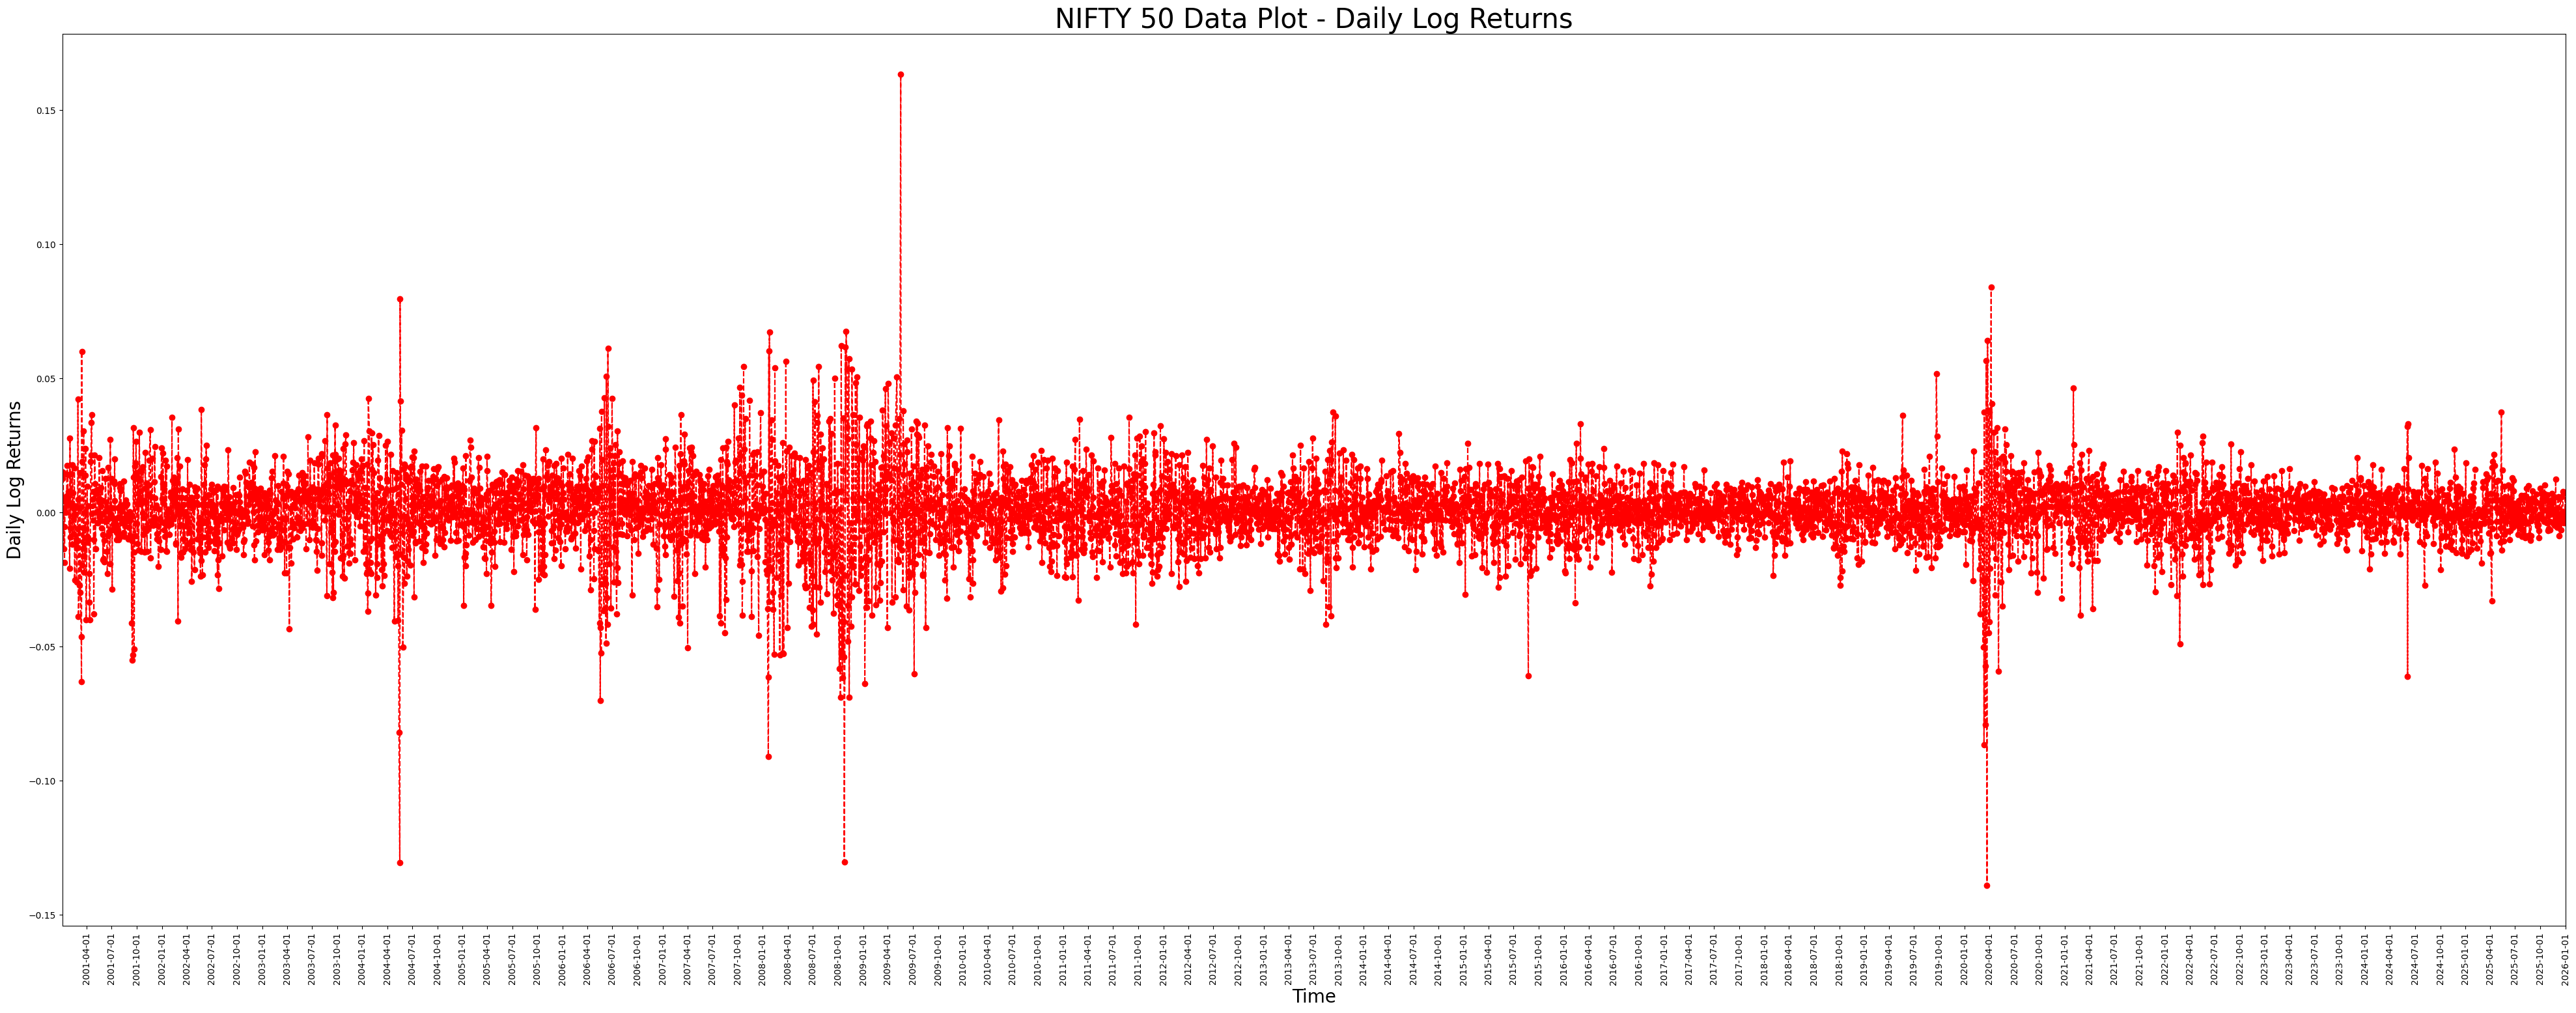

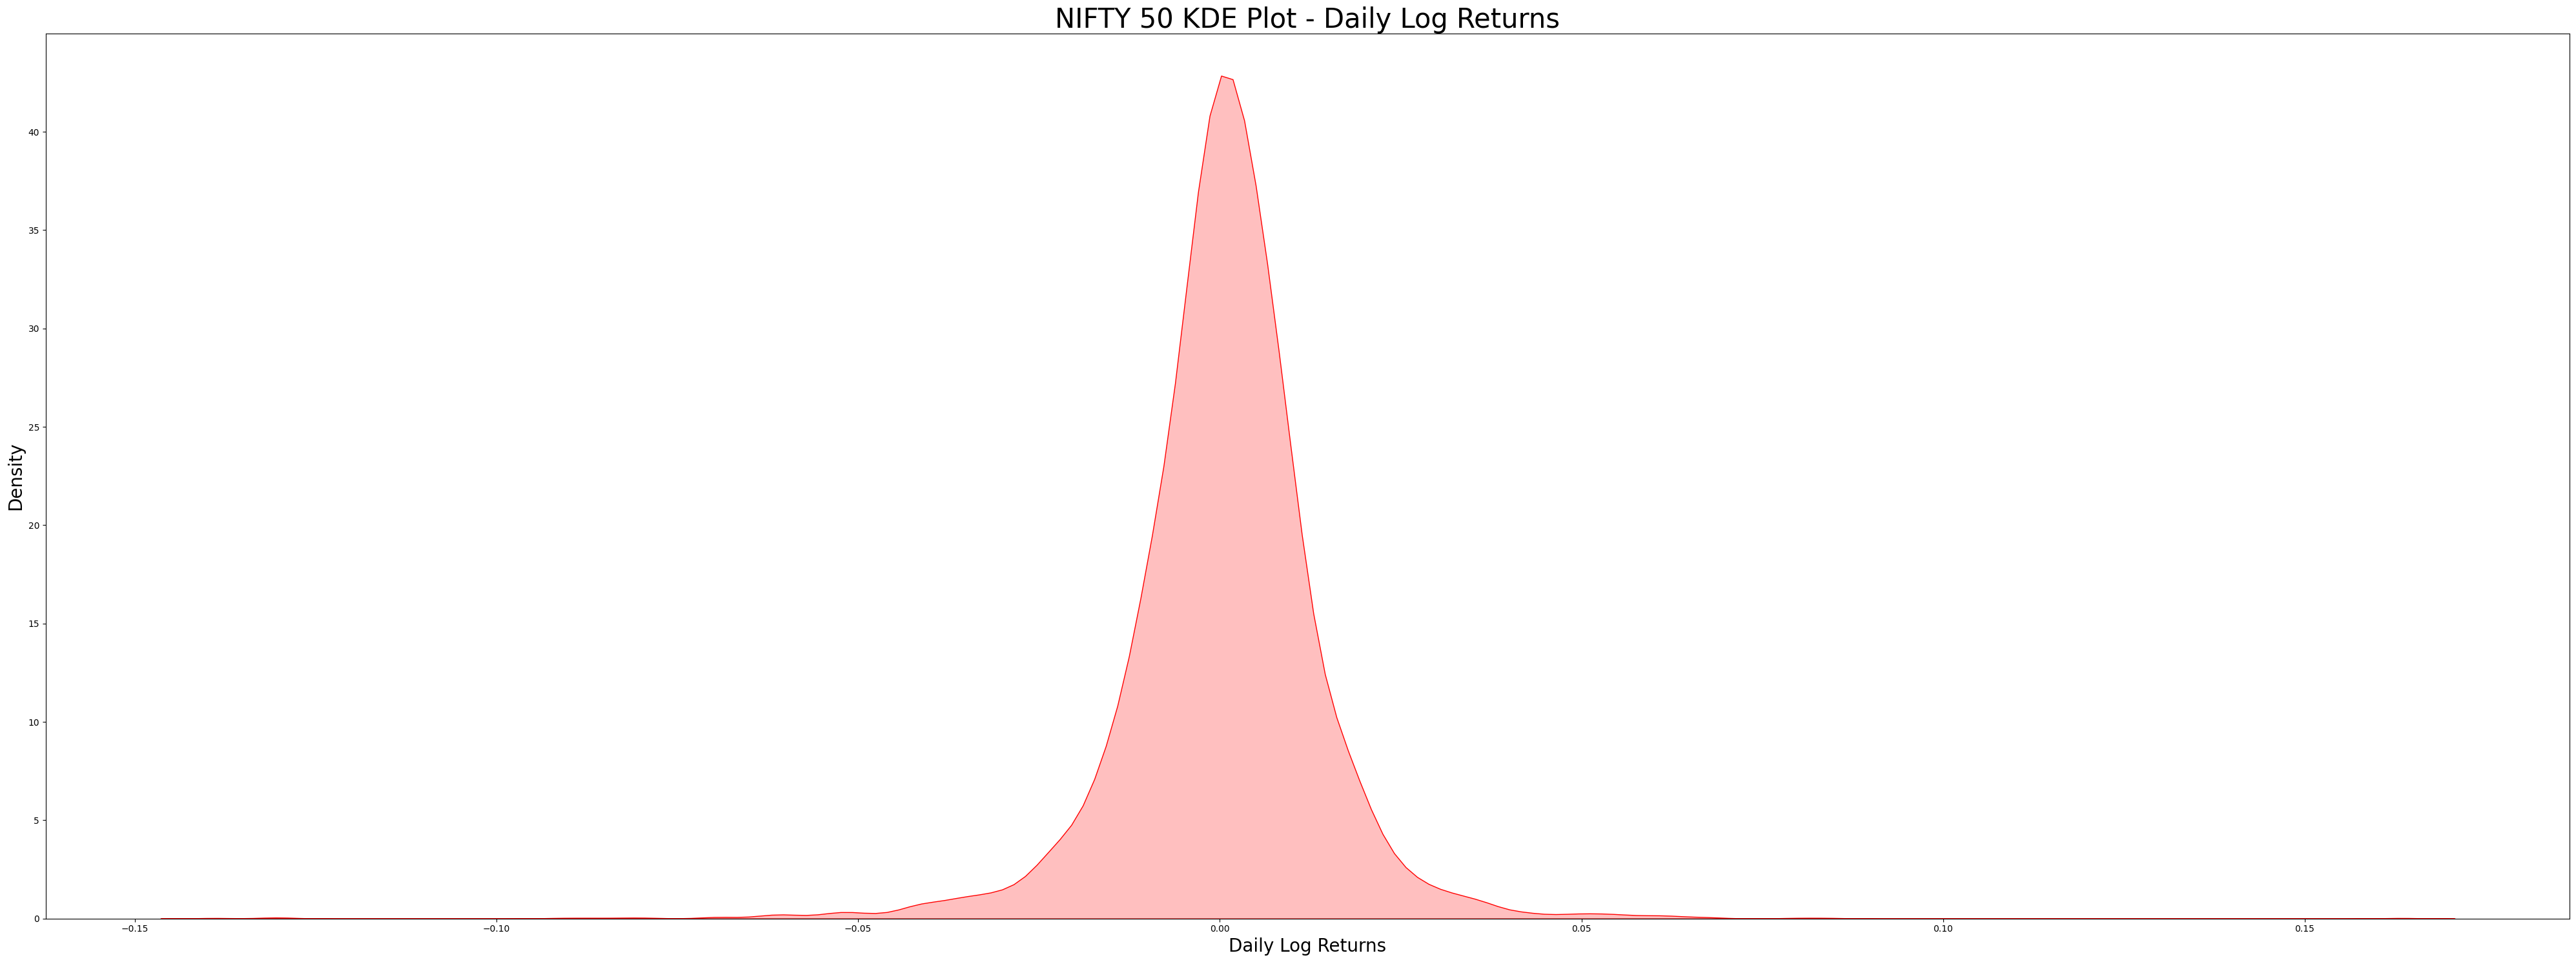

STATISTICAL TESTS
Following statistical tests are being conducted on the data to better understand the distribution guide our way-forward:
      1. Kurtosis - to test for tail thickness
      2. Skewness - to test for tail assymetry
      3. Normality Rejection - Jarque–Bera (moment-based) and Anderson-Darling (tail-sensitive) - to support rejection of Gaussian MC
      4. Volatility Clustering - ACF and Ljung-Box on squared returns - to support development of features for XGBoost model

1. Kurtosis Test

Kurtosis = 12.40.
Outcome:
    Distribution is Leptokurtic (fat tails) - meaning there is a higher probability of extreme outcomes and volatility clustering is likely present. Thus, our project will adopt the below approach:
    1. Monte-Carlo: During implementation, we will incorporate fat-tailed innovations (e.g., Student-t) to preserve tail behavior.
    2. XGBoost: No winsorization of extremes. Outliers shall be retained as-is as they represent genuine market behavior rather than 

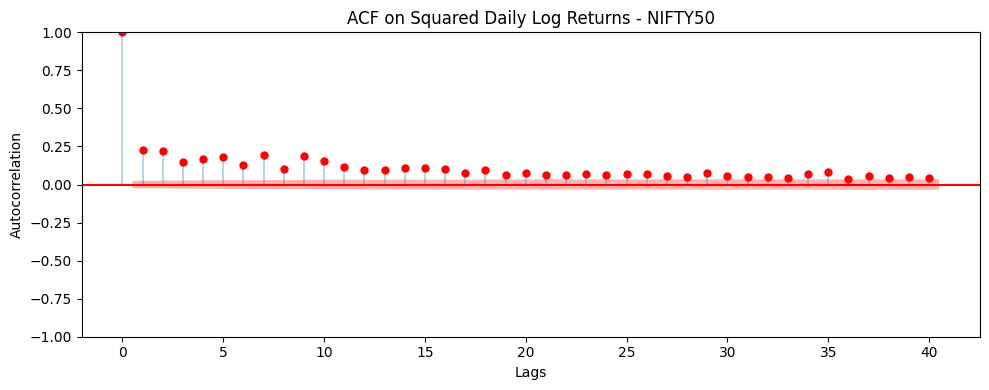

4.2. Ljung-Box on squared log returns
LB Test:
        lb_stat  lb_pvalue
10  1919.593515        0.0
20  2471.621175        0.0
40  2913.596673        0.0


In [4]:
# View summary statistics
print('SUMMARY STATISTICS')
print(f'NIFTY50 dataset - Top 5 and Bottom 5 rows:\n{nifty50_cudf.head()}\n{nifty50_cudf.tail()}')
print(f'NIFTY50 summary statistics:\n{nifty50_cudf.describe()}')
print('========================================================')
print('EDA')
# Plot Data
fig, ax = plt.subplots(figsize=(40, 15), dpi=100)
nifty50_cudf['date'] = cudf.to_datetime(nifty50_cudf['date'])
ax.plot(nifty50_cudf['date'], nifty50_cudf['daily_log_closing_value'], '--', color='red', marker='o')
ax.set_title('NIFTY 50 Data Plot - Daily Log Returns', fontsize=30)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Daily Log Returns', fontsize=20)
ax.set_xlim(nifty50_cudf['date'].min(), nifty50_cudf['date'].max())
ax.xaxis.set_major_locator(mdates.MonthLocator([1, 4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()
fig_kde, ax_kde = plt.subplots(figsize=(40, 15), dpi=100)
sns.kdeplot(nifty50_cudf['daily_log_closing_value'].to_numpy(), bw_adjust=1, bw_method='silverman', color='red', fill=True, ax=ax_kde)
ax_kde.set_title('NIFTY 50 KDE Plot - Daily Log Returns', fontsize=30)
ax_kde.set_xlabel('Daily Log Returns', fontsize=20)
ax_kde.set_ylabel('Density', fontsize=20)
fig_kde.tight_layout()
plt.show()
print('========================================================')
print('STATISTICAL TESTS')
# Tests
print(f"""Following statistical tests are being conducted on the data to better understand the distribution guide our way-forward:
      1. Kurtosis - to test for tail thickness
      2. Skewness - to test for tail assymetry
      3. Normality Rejection - Jarque–Bera (moment-based) and Anderson-Darling (tail-sensitive) - to support rejection of Gaussian MC
      4. Volatility Clustering - ACF and Ljung-Box on squared returns - to support development of features for XGBoost model
""")
# 1. Kurtosis Test
print('1. Kurtosis Test')
ret_log = nifty50_cudf['daily_log_closing_value'].to_numpy()
nifty50_kurt = kurtosis(
    ret_log,
    fisher=True, # capturing excess kurtosis = pearson kurtosis - 3
    bias=False # apply bias correction on estimator
)
if nifty50_kurt == 0:
    print(f'Kurtosis = {nifty50_kurt:.2f}. Outcome - Normal: Tail behavior is consistent with normality')
elif nifty50_kurt > 0:
    print(f"""
Kurtosis = {nifty50_kurt:.2f}.
Outcome:
    Distribution is Leptokurtic (fat tails) - meaning there is a higher probability of extreme outcomes and volatility clustering is likely present. Thus, our project will adopt the below approach:
    1. Monte-Carlo: During implementation, we will incorporate fat-tailed innovations (e.g., Student-t) to preserve tail behavior.
    2. XGBoost: No winsorization of extremes. Outliers shall be retained as-is as they represent genuine market behavior rather than pure noise.
    3. Risk Metrics: Conditional Value at Risk (CVaR) - over VaR - will be the preferred metric of choice to ensure sensitivity to tail risk.
""")
elif nifty50_kurt < 0:
    print(f"""
Kurtosis = {nifty50_kurt:.2f}.
Outcome:
    Distribution is Platykurtic (thin tails) - meaning there are fewer extreme events relative to a normal distribution. This suggests relatively stable return dynamics with reduced tail risk. Hence, our project will adopt the below approach:
    1. Monte-Carlo: Parametric simulations with Gaussian or mildly fat-tailed innovations will be considered.
    2. XGBoost: Limited winsorization or other outlier elimination methods shall be evaluated - depending upon the model's out-of-sample performance.
    3. Risk Metrics: While CVaR will remain available for completeness, standard deviation and Sharpe-based metrics will receive greater emphasis given the reduced tail risk profile. 
""")
x = ret_log[np.isfinite(ret_log)]
nifty50_kurt_check = kurtosis(x, fisher=True, bias=False)
print('Kurtosis sanity check:')
if abs(nifty50_kurt - nifty50_kurt_check) < 1e-6:
    print('Pass')
else:
    print('Fail')
# 2. Skewness Test
print('\n2. Skewness Test')
nifty50_skew = skew(
    ret_log,
    bias=False # apply bias correction on estimator
)
if nifty50_skew > 0:
    print(f"""
Skewness = {nifty50_skew:.2f}.
Outcome:
    Distribution is positively skewed (right-skewed) – indicating a heavier right tail and a higher frequency of large positive return realizations.
    This suggests upside-dominated asymmetry, although tail risk is material since kurtosis is elevated (12.40). Accordingly, the project will adopt the following approach:
    1. Monte-Carlo: Symmetric or mildly asymmetric fat-tailed innovations may be considered, subject to validation against empirical tails.
    2. XGBoost: Retain positive return extremes, as they may capture convex payoff structures or regime-driven upside events.
    3. Risk Metrics: CVaR will remain available for completeness, while performance evaluation may also consider upside-sensitive metrics where appropriate.
""")
else:
    print(f"""
Skewness = {nifty50_skew:.2f}.
Outcome:
    Distribution is negatively skewed (left-skewed) – indicating a heavier left tail and a higher frequency of large negative returns relative to positive extremes.
    This highlights pronounced downside asymmetry and elevated crash risk. Accordingly, the project will adopt the following approach:
    1. Monte-Carlo: Consider asymmetric or skew-aware innovations (e.g., skew-t), or focus explicitly on left-tail behavior in simulations.
    2. XGBoost: Preserve negative return extremes without winsorization, and prioritize downside-sensitive features (e.g., downside volatility, drawdown-related measures).
    3. Risk Metrics: Emphasize left-tail CVaR as the primary risk metric to ensure sensitivity to downside tail risk.
""")
nifty50_skew_check = skew(x, bias=False)
print('Skewness sanity check:')
if abs(nifty50_skew - nifty50_skew_check) < 1e-6:
    print('Pass')
else:
    print('Fail')
# 3. Normality Rejection Tests (Jarque-Bera and Anderson-Darling)
print('\n3. Normality Rejection Tests (Jarque-Bera and Anderson-Darling)')
print('3.1. Jarque-Bera Test: H0: Returns are normally distributed')
nifty50_jb_stat, nifty50_jb_p = jarque_bera(x)
alpha = 0.05
print(f'Jarque-Bera Test Results: JB-Statistic = {nifty50_jb_stat:.2f} and P-Value = {nifty50_jb_p}')
if nifty50_jb_p < alpha:
    print(f"""Reject H0: Returns are not normally distributed. Accordingly, the project will adopt the following approach:
1. Monte-Carlo: Gaussian Monte-Carlo is explicitly rejected.
2. XGBoost: Extreme observations will be retained without winsorization and feature engineering will explicitly capture nonlinear and regime-dependent behavior, including rolling volatility and downside-sensitive features.
3. Risk Metrics: CVaR will be emphasized over VaR to ensure sensitivity to tail risk.
""")
else:
    print(f"""Fail to Reject H0: Returns are normally distributed. Accordingly, the project will adopt the following approach:
1. Monte-Carlo: Gaussian Monte-Carlo simulations may be used as a baseline.
2. XGBoost: Limited winsorization or robust scaling of extreme observations may be evaluated and feature engineering will emphasize mean-variance dynamics rather than tail-specific assymetries.
3. Risk Metrics: Variance-based metrics (standard deviation, Sharpe ratio) may receive greater emphasis, given the absence of strong statistical evidence of tail risk. CVaR may be used for completedness.
""")
print('3.2. Anderson-Darling Test: H0: Returns are normally distributed')
nifty50_ad = anderson(x, dist='norm')
nifty50_ad_stat = nifty50_ad.statistic
nifty50_ad_cvalue = nifty50_ad.critical_values[2] # critical value @ 5% significance
print(f'Anderson-Darling Test Results: AD-Statistic = {nifty50_ad_stat:.2f} and AD-Critical Value @5% Significance = {nifty50_ad_cvalue}')
if nifty50_ad_stat > nifty50_ad_cvalue:
    print(f'Reject H0: Returns are not normally distributed. Project approach remains same as outlined in JB above.')
else:
    print(f'Fail to Reject H0: Returns are normally distributed. Project approach remains same as outlined in JB above.')
# 4. Volatility Clustering
print('\n4. Volatility Clustering Tests (ACF and Ljung-Box)')
print('4.1. ACF on squared log returns')
sq_ret_log = x**2
fig_acf, ax_acf = plt.subplots(figsize=(10, 4), dpi=100)
plot_acf(
    sq_ret_log,
    lags=40,
    alpha=0.05,
    ax=ax_acf
)
for line in ax_acf.lines:
    line.set_color('red')

for collections in ax_acf.collections:
    collections.set_facecolor('red')
    collections.set_alpha(0.3)

ax_acf.set_title('ACF on Squared Daily Log Returns - NIFTY50')
ax_acf.set_xlabel('Lags')
ax_acf.set_ylabel('Autocorrelation')
fig_acf.tight_layout()
plt.show()
print('4.2. Ljung-Box on squared log returns')
nifty50_lb = acorr_ljungbox(
    sq_ret_log,
    lags=[10, 20, 40],
    return_df=True
)
print(f'LB Test:\n{nifty50_lb}')

**Conclusion - NIFTY50**

Statistical diagnostics indicate that NIFTY 50 daily log returns are strongly non-Gaussian, exhibiting pronounced fat tails, negative skewness, and persistent volatility clustering. Normality is decisively rejected by both Jarque–Bera and Anderson–Darling tests, while autocorrelation in squared returns confirms time-varying variance dynamics. Accordingly, Gaussian Monte-Carlo is inappropriate as a standalone risk model, extreme observations are retained for machine learning, volatility-aware features are emphasized, and downside-focused risk measures such as CVaR are prioritized.

#### 2.2.2. EDA and Tests on NIFTYBank data

SUMMARY STATISTICS
NIFTYBank dataset - Top 5 and Bottom 5 rows:
   SNo.        date  closing_value  daily_closing_pct_change  \
0     1  2001-01-02         1015.7                  0.038654   
1     2  2001-01-03         1043.7                  0.027567   
2     3  2001-01-04         1034.6                 -0.008719   
3     4  2001-01-05         1046.9                  0.011889   
4     5  2001-01-08         1033.9                 -0.012418   

   daily_log_closing_value  instrument_token trading_symbol  
0                 0.037926            260105     NIFTY BANK  
1                 0.027194            260105     NIFTY BANK  
2                -0.008757            260105     NIFTY BANK  
3                 0.011819            260105     NIFTY BANK  
4                -0.012495            260105     NIFTY BANK  
      SNo.        date  closing_value  daily_closing_pct_change  \
6203  6204  2025-12-26       59011.35                 -0.002910   
6204  6205  2025-12-29       58932.35        

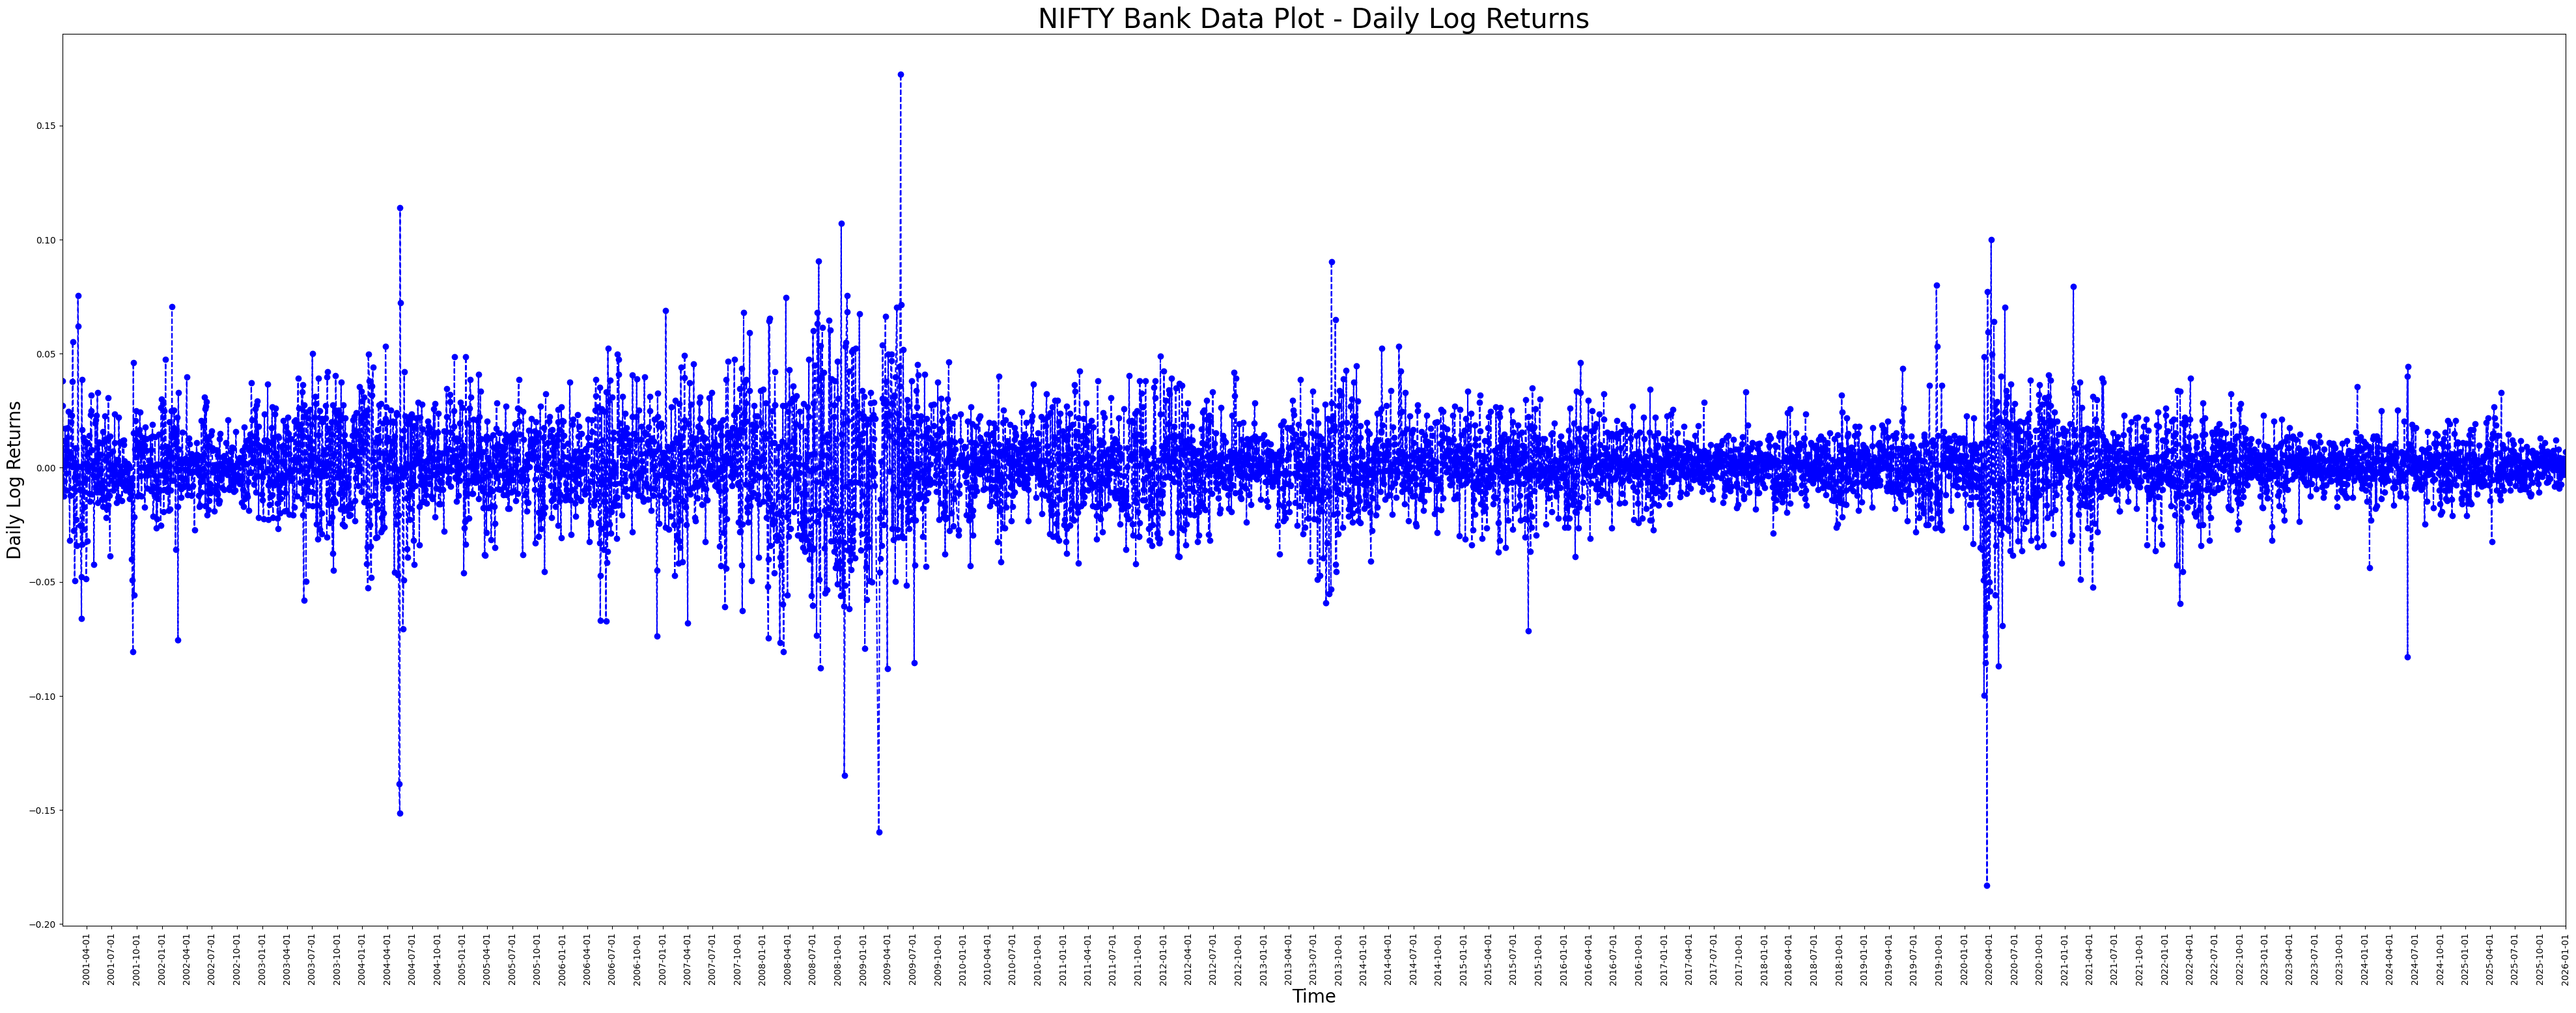

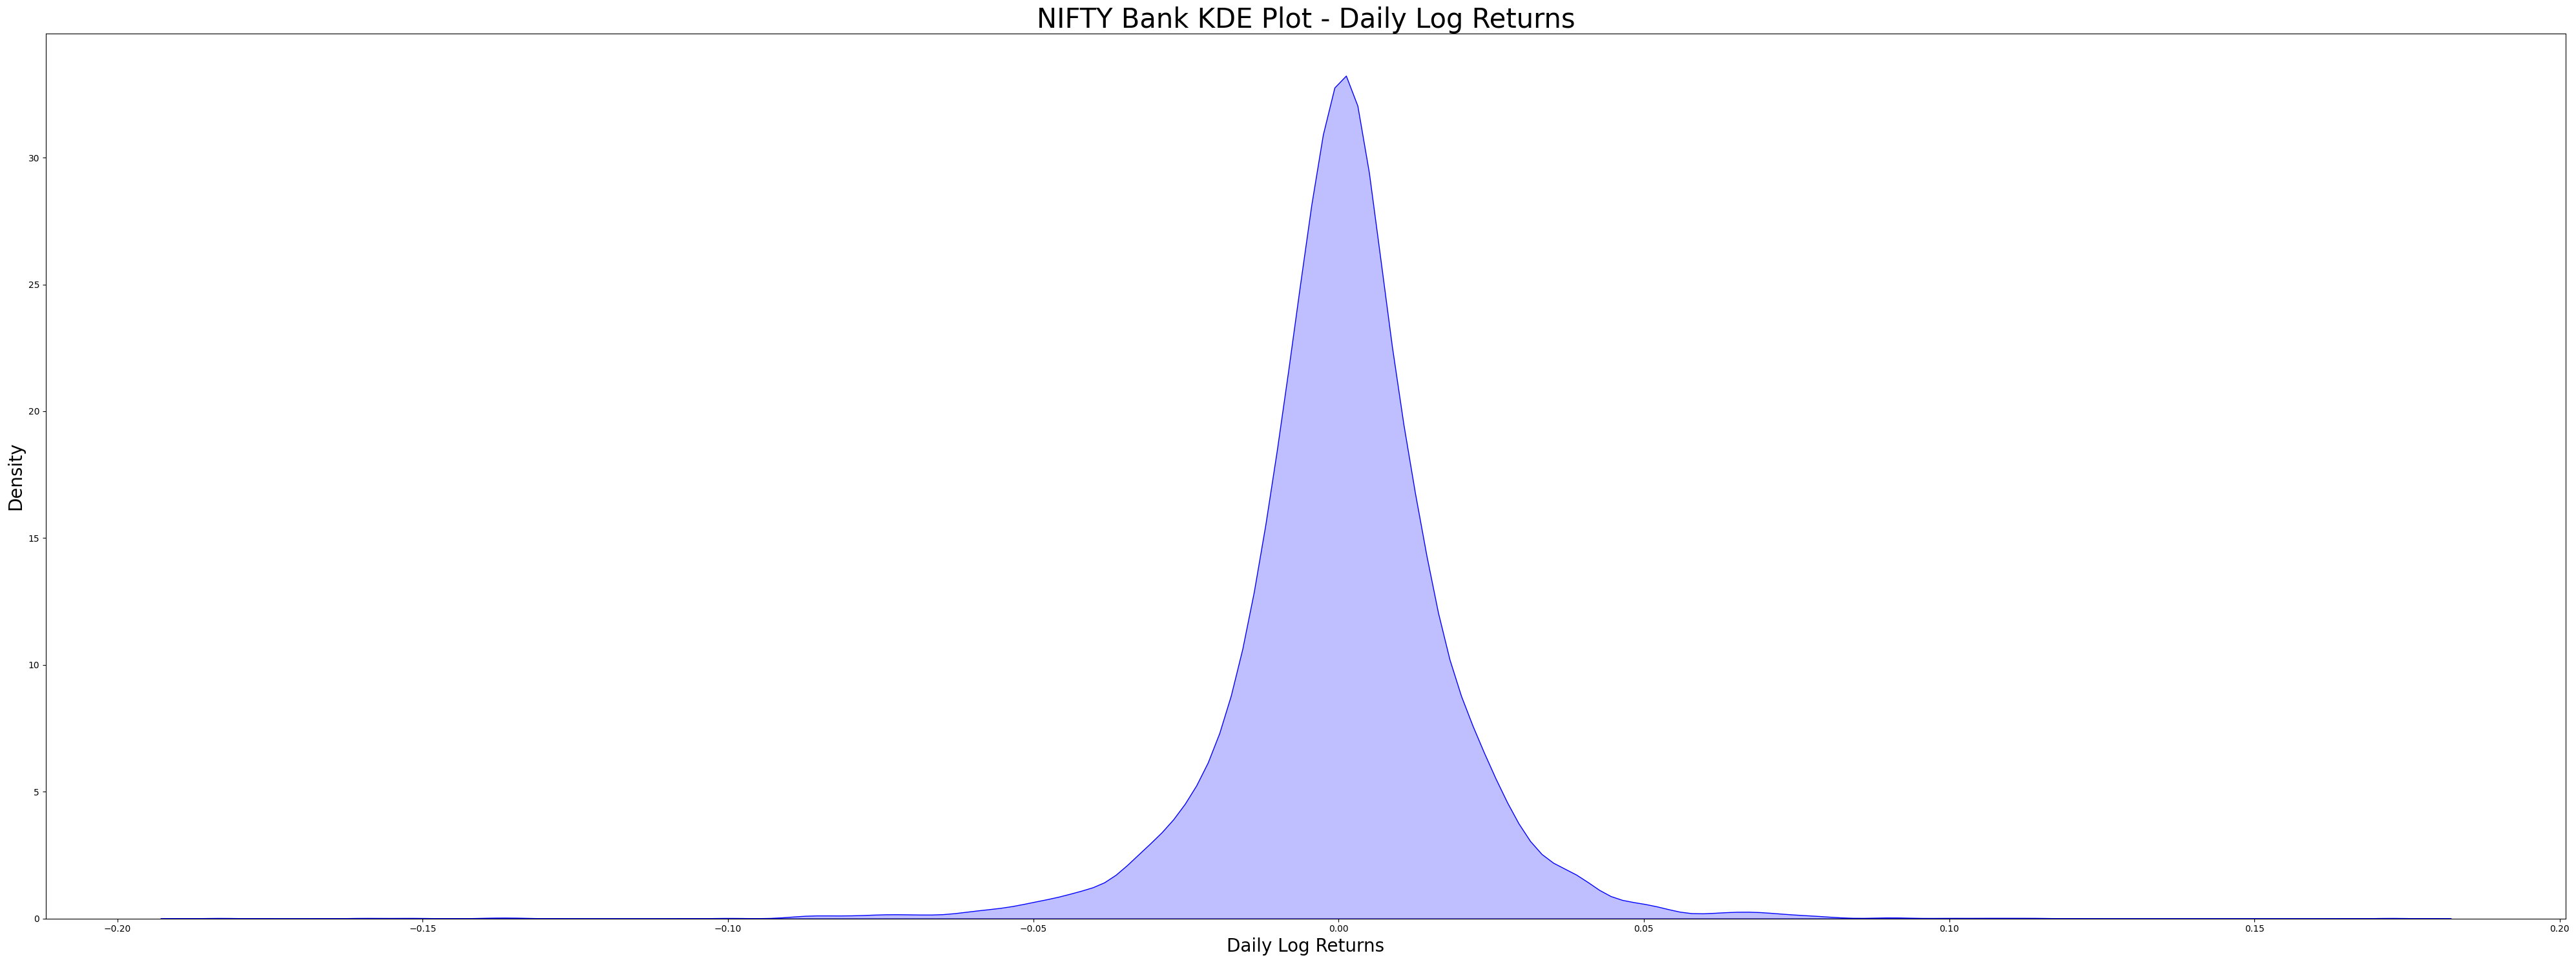

STATISTICAL TESTS
Following statistical tests are being conducted on the data to better understand the distribution guide our way-forward:
      1. Kurtosis - to test for tail thickness
      2. Skewness - to test for tail assymetry
      3. Normality Rejection - Jarque–Bera (moment-based) and Anderson-Darling (tail-sensitive) - to support rejection of Gaussian MC
      4. Volatility Clustering - ACF and Ljung-Box on squared returns - to support development of features for XGBoost model

1. Kurtosis Test

Kurtosis = 9.35.
Outcome:
    Distribution is Leptokurtic (fat tails) - meaning there is a higher probability of extreme outcomes and volatility clustering is likely present. Thus, our project will adopt the below approach:
    1. Monte-Carlo: During implementation, we will incorporate fat-tailed innovations (e.g., Student-t) to preserve tail behavior.
    2. XGBoost: No winsorization of extremes. Outliers shall be retained as-is as they represent genuine market behavior rather than p

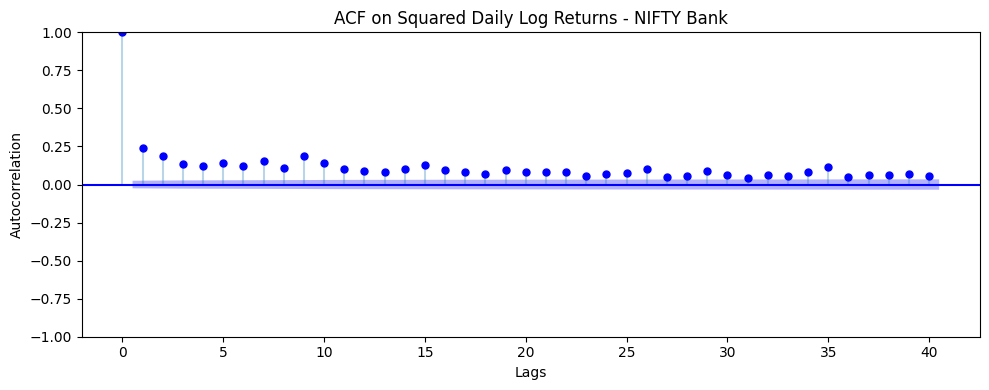

4.2. Ljung-Box on squared log returns
LB Test:
        lb_stat  lb_pvalue
10  1566.225637        0.0
20  2115.801638        0.0
40  2758.723772        0.0


In [5]:
# View summary statistics
print('SUMMARY STATISTICS')
print(f'NIFTYBank dataset - Top 5 and Bottom 5 rows:\n{niftybank_cudf.head()}\n{niftybank_cudf.tail()}')
print(f'NIFTYBank summary statistics:\n{niftybank_cudf.describe()}')
print('========================================================')
print('EDA')
# Plot Data
fig, ax = plt.subplots(figsize=(40, 15), dpi=100)
niftybank_cudf['date'] = cudf.to_datetime(niftybank_cudf['date'])
ax.plot(niftybank_cudf['date'], niftybank_cudf['daily_log_closing_value'], '--', color='blue', marker='o')
ax.set_title('NIFTY Bank Data Plot - Daily Log Returns', fontsize=30)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Daily Log Returns', fontsize=20)
ax.set_xlim(niftybank_cudf['date'].min(), niftybank_cudf['date'].max())
ax.xaxis.set_major_locator(mdates.MonthLocator([1, 4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()
fig_kde, ax_kde = plt.subplots(figsize=(40, 15), dpi=100)
sns.kdeplot(niftybank_cudf['daily_log_closing_value'].to_numpy(), bw_adjust=1, bw_method='silverman', color='blue', fill=True, ax=ax_kde)
ax_kde.set_title('NIFTY Bank KDE Plot - Daily Log Returns', fontsize=30)
ax_kde.set_xlabel('Daily Log Returns', fontsize=20)
ax_kde.set_ylabel('Density', fontsize=20)
fig_kde.tight_layout()
plt.show()
print('========================================================')
print('STATISTICAL TESTS')
# Tests
print(f"""Following statistical tests are being conducted on the data to better understand the distribution guide our way-forward:
      1. Kurtosis - to test for tail thickness
      2. Skewness - to test for tail assymetry
      3. Normality Rejection - Jarque–Bera (moment-based) and Anderson-Darling (tail-sensitive) - to support rejection of Gaussian MC
      4. Volatility Clustering - ACF and Ljung-Box on squared returns - to support development of features for XGBoost model
""")
# 1. Kurtosis Test
print('1. Kurtosis Test')
ret_log = niftybank_cudf['daily_log_closing_value'].to_numpy()
niftybank_kurt = kurtosis(
    ret_log,
    fisher=True, # capturing excess kurtosis = pearson kurtosis - 3
    bias=False # apply bias correction on estimator
)
if niftybank_kurt == 0:
    print(f'Kurtosis = {niftybank_kurt:.2f}. Outcome - Normal: Tail behavior is consistent with normality')
elif niftybank_kurt > 0:
    print(f"""
Kurtosis = {niftybank_kurt:.2f}.
Outcome:
    Distribution is Leptokurtic (fat tails) - meaning there is a higher probability of extreme outcomes and volatility clustering is likely present. Thus, our project will adopt the below approach:
    1. Monte-Carlo: During implementation, we will incorporate fat-tailed innovations (e.g., Student-t) to preserve tail behavior.
    2. XGBoost: No winsorization of extremes. Outliers shall be retained as-is as they represent genuine market behavior rather than pure noise.
    3. Risk Metrics: Conditional Value at Risk (CVaR) - over VaR - will be the preferred metric of choice to ensure sensitivity to tail risk.
""")
elif niftybank_kurt < 0:
    print(f"""
Kurtosis = {niftybank_kurt:.2f}.
Outcome:
    Distribution is Platykurtic (thin tails) - meaning there are fewer extreme events relative to a normal distribution. This suggests relatively stable return dynamics with reduced tail risk. Hence, our project will adopt the below approach:
    1. Monte-Carlo: Parametric simulations with Gaussian or mildly fat-tailed innovations will be considered.
    2. XGBoost: Limited winsorization or other outlier elimination methods shall be evaluated - depending upon the model's out-of-sample performance.
    3. Risk Metrics: While CVaR will remain available for completeness, standard deviation and Sharpe-based metrics will receive greater emphasis given the reduced tail risk profile. 
""")
x = ret_log[np.isfinite(ret_log)]
niftybank_kurt_check = kurtosis(x, fisher=True, bias=False)
print('Kurtosis sanity check:')
if abs(niftybank_kurt - niftybank_kurt_check) < 1e-6:
    print('Pass')
else:
    print('Fail')
# 2. Skewness Test
print('\n2. Skewness Test')
niftybank_skew = skew(
    ret_log,
    bias=False # apply bias correction on estimator
)
if niftybank_skew > 0:
    print(f"""
Skewness = {niftybank_skew:.2f}.
Outcome:
    Distribution is positively skewed (right-skewed) – indicating a heavier right tail and a higher frequency of large positive return realizations.
    This suggests upside-dominated asymmetry, although tail risk is material since kurtosis is elevated. Accordingly, the project will adopt the following approach:
    1. Monte-Carlo: Symmetric or mildly asymmetric fat-tailed innovations may be considered, subject to validation against empirical tails.
    2. XGBoost: Retain positive return extremes, as they may capture convex payoff structures or regime-driven upside events.
    3. Risk Metrics: CVaR will remain available for completeness, while performance evaluation may also consider upside-sensitive metrics where appropriate.
""")
else:
    print(f"""
Skewness = {niftybank_skew:.2f}.
Outcome:
    Distribution is negatively skewed (left-skewed) – indicating a heavier left tail and a higher frequency of large negative returns relative to positive extremes.
    This highlights pronounced downside asymmetry and elevated crash risk. Accordingly, the project will adopt the following approach:
    1. Monte-Carlo: Consider asymmetric or skew-aware innovations (e.g., skew-t), or focus explicitly on left-tail behavior in simulations.
    2. XGBoost: Preserve negative return extremes without winsorization, and prioritize downside-sensitive features (e.g., downside volatility, drawdown-related measures).
    3. Risk Metrics: Emphasize left-tail CVaR as the primary risk metric to ensure sensitivity to downside tail risk.
""")
niftybank_skew_check = skew(x, bias=False)
print('Skewness sanity check:')
if abs(niftybank_skew - niftybank_skew_check) < 1e-6:
    print('Pass')
else:
    print('Fail')
# 3. Normality Rejection Tests (Jarque-Bera and Anderson-Darling)
print('\n3. Normality Rejection Tests (Jarque-Bera and Anderson-Darling)')
print('3.1. Jarque-Bera Test: H0: Returns are normally distributed')
niftybank_jb_stat, niftybank_jb_p = jarque_bera(x)
alpha = 0.05
print(f'Jarque-Bera Test Results: JB-Statistic = {niftybank_jb_stat:.2f} and P-Value = {niftybank_jb_p}')
if niftybank_jb_p < alpha:
    print(f"""Reject H0: Returns are not normally distributed. Accordingly, the project will adopt the following approach:
1. Monte-Carlo: Gaussian Monte-Carlo is explicitly rejected.
2. XGBoost: Extreme observations will be retained without winsorization and feature engineering will explicitly capture nonlinear and regime-dependent behavior, including rolling volatility and downside-sensitive features.
3. Risk Metrics: CVaR will be emphasized over VaR to ensure sensitivity to tail risk.
""")
else:
    print(f"""Fail to Reject H0: Returns are normally distributed. Accordingly, the project will adopt the following approach:
1. Monte-Carlo: Gaussian Monte-Carlo simulations may be used as a baseline.
2. XGBoost: Limited winsorization or robust scaling of extreme observations may be evaluated and feature engineering will emphasize mean-variance dynamics rather than tail-specific assymetries.
3. Risk Metrics: Variance-based metrics (standard deviation, Sharpe ratio) may receive greater emphasis, given the absence of strong statistical evidence of tail risk. CVaR may be used for completedness.
""")
print('3.2. Anderson-Darling Test: H0: Returns are normally distributed')
niftybank_ad = anderson(x, dist='norm')
niftybank_ad_stat = niftybank_ad.statistic
niftybank_ad_cvalue = niftybank_ad.critical_values[2] # critical value @ 5% significance
print(f'Anderson-Darling Test Results: AD-Statistic = {niftybank_ad_stat:.2f} and AD-Critical Value @5% Significance = {niftybank_ad_cvalue}')
if niftybank_ad_stat > niftybank_ad_cvalue:
    print(f'Reject H0: Returns are not normally distributed. Project approach remains same as outlined in JB above.')
else:
    print(f'Fail to Reject H0: Returns are normally distributed. Project approach remains same as outlined in JB above.')
# 4. Volatility Clustering
print('\n4. Volatility Clustering Tests (ACF and Ljung-Box)')
print('4.1. ACF on squared log returns')
sq_ret_log = x**2
fig_acf, ax_acf = plt.subplots(figsize=(10, 4), dpi=100)
plot_acf(
    sq_ret_log,
    lags=40,
    alpha=0.05,
    ax=ax_acf
)
for line in ax_acf.lines:
    line.set_color('blue')

for collections in ax_acf.collections:
    collections.set_facecolor('blue')
    collections.set_alpha(0.3)

ax_acf.set_title('ACF on Squared Daily Log Returns - NIFTY Bank')
ax_acf.set_xlabel('Lags')
ax_acf.set_ylabel('Autocorrelation')
fig_acf.tight_layout()
plt.show()
print('4.2. Ljung-Box on squared log returns')
niftybank_lb = acorr_ljungbox(
    sq_ret_log,
    lags=[10, 20, 40],
    return_df=True
)
print(f'LB Test:\n{niftybank_lb}')

**Conclusion - NIFTY Bank**

Statistical diagnostics indicate that NIFTY Bank daily log returns are strongly non-Gaussian, characterized by pronounced fat tails, clear negative skewness, and highly persistent volatility clustering. Excess kurtosis (9.35) confirms a materially elevated probability of extreme outcomes, while negative skewness (-0.44) highlights asymmetric downside risk and heightened crash sensitivity. Normality is decisively rejected by both Jarque–Bera and Anderson–Darling tests, eliminating Gaussian assumptions. Autocorrelation in squared returns, reinforced by Ljung–Box test rejections across multiple horizons, provides strong evidence of time-varying and persistent volatility dynamics. Accordingly, Gaussian Monte Carlo is unsuitable as a standalone risk framework; simulations must incorporate fat-tailed and potentially skewed innovations, extreme observations should be preserved for machine learning, volatility- and downside-aware features are central to XGBoost modeling, and left-tail-focused risk measures such as CVaR are prioritized over VaR to accurately capture systemic and crash-related risk embedded in NIFTY Bank returns.

#### 2.2.3. EDA and Tests on Gold Futures (proxy for Gold spot) data

SUMMARY STATISTICS
Gold Futures dataset - Top 5 and Bottom 5 rows:
   SNo.        date  closing_value  daily_closing_pct_change  \
0     1  2001-01-03     268.000000                 -0.001490   
1     2  2001-01-04     267.299988                 -0.002612   
2     3  2001-01-05     268.000000                  0.002619   
3     4  2001-01-08     268.000000                  0.000000   
4     5  2001-01-09     267.500000                 -0.001866   

   daily_log_closing_value                    exhange_name trading_symbol  
0                -0.001491  COMEX GOLD FUTURES (CME GROUP)           GC=F  
1                -0.002615  COMEX GOLD FUTURES (CME GROUP)           GC=F  
2                 0.002615  COMEX GOLD FUTURES (CME GROUP)           GC=F  
3                 0.000000  COMEX GOLD FUTURES (CME GROUP)           GC=F  
4                -0.001867  COMEX GOLD FUTURES (CME GROUP)           GC=F  
      SNo.        date  closing_value  daily_closing_pct_change  \
6268  6269  2025-12-24   

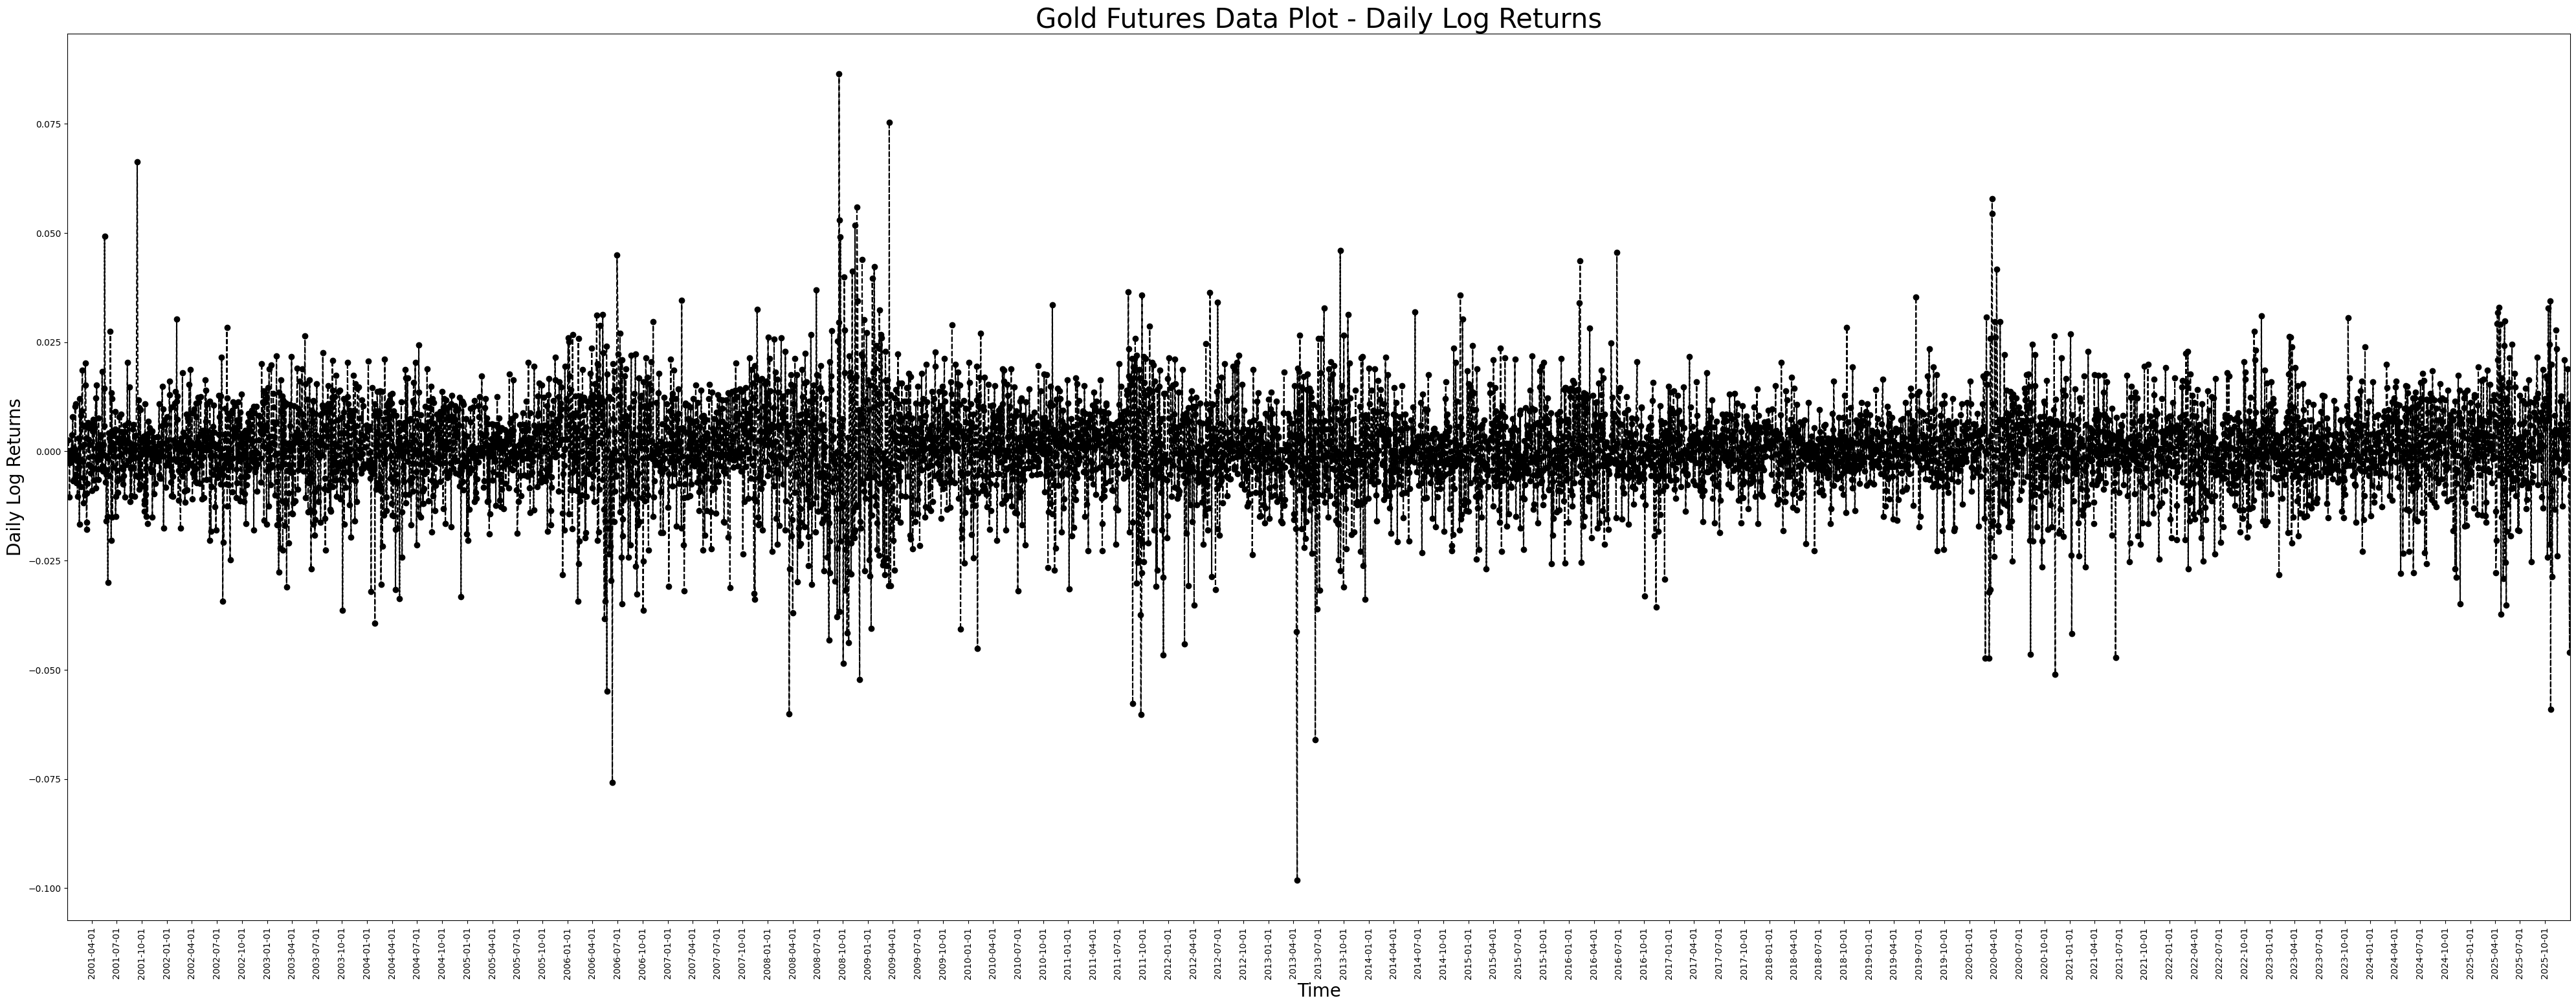

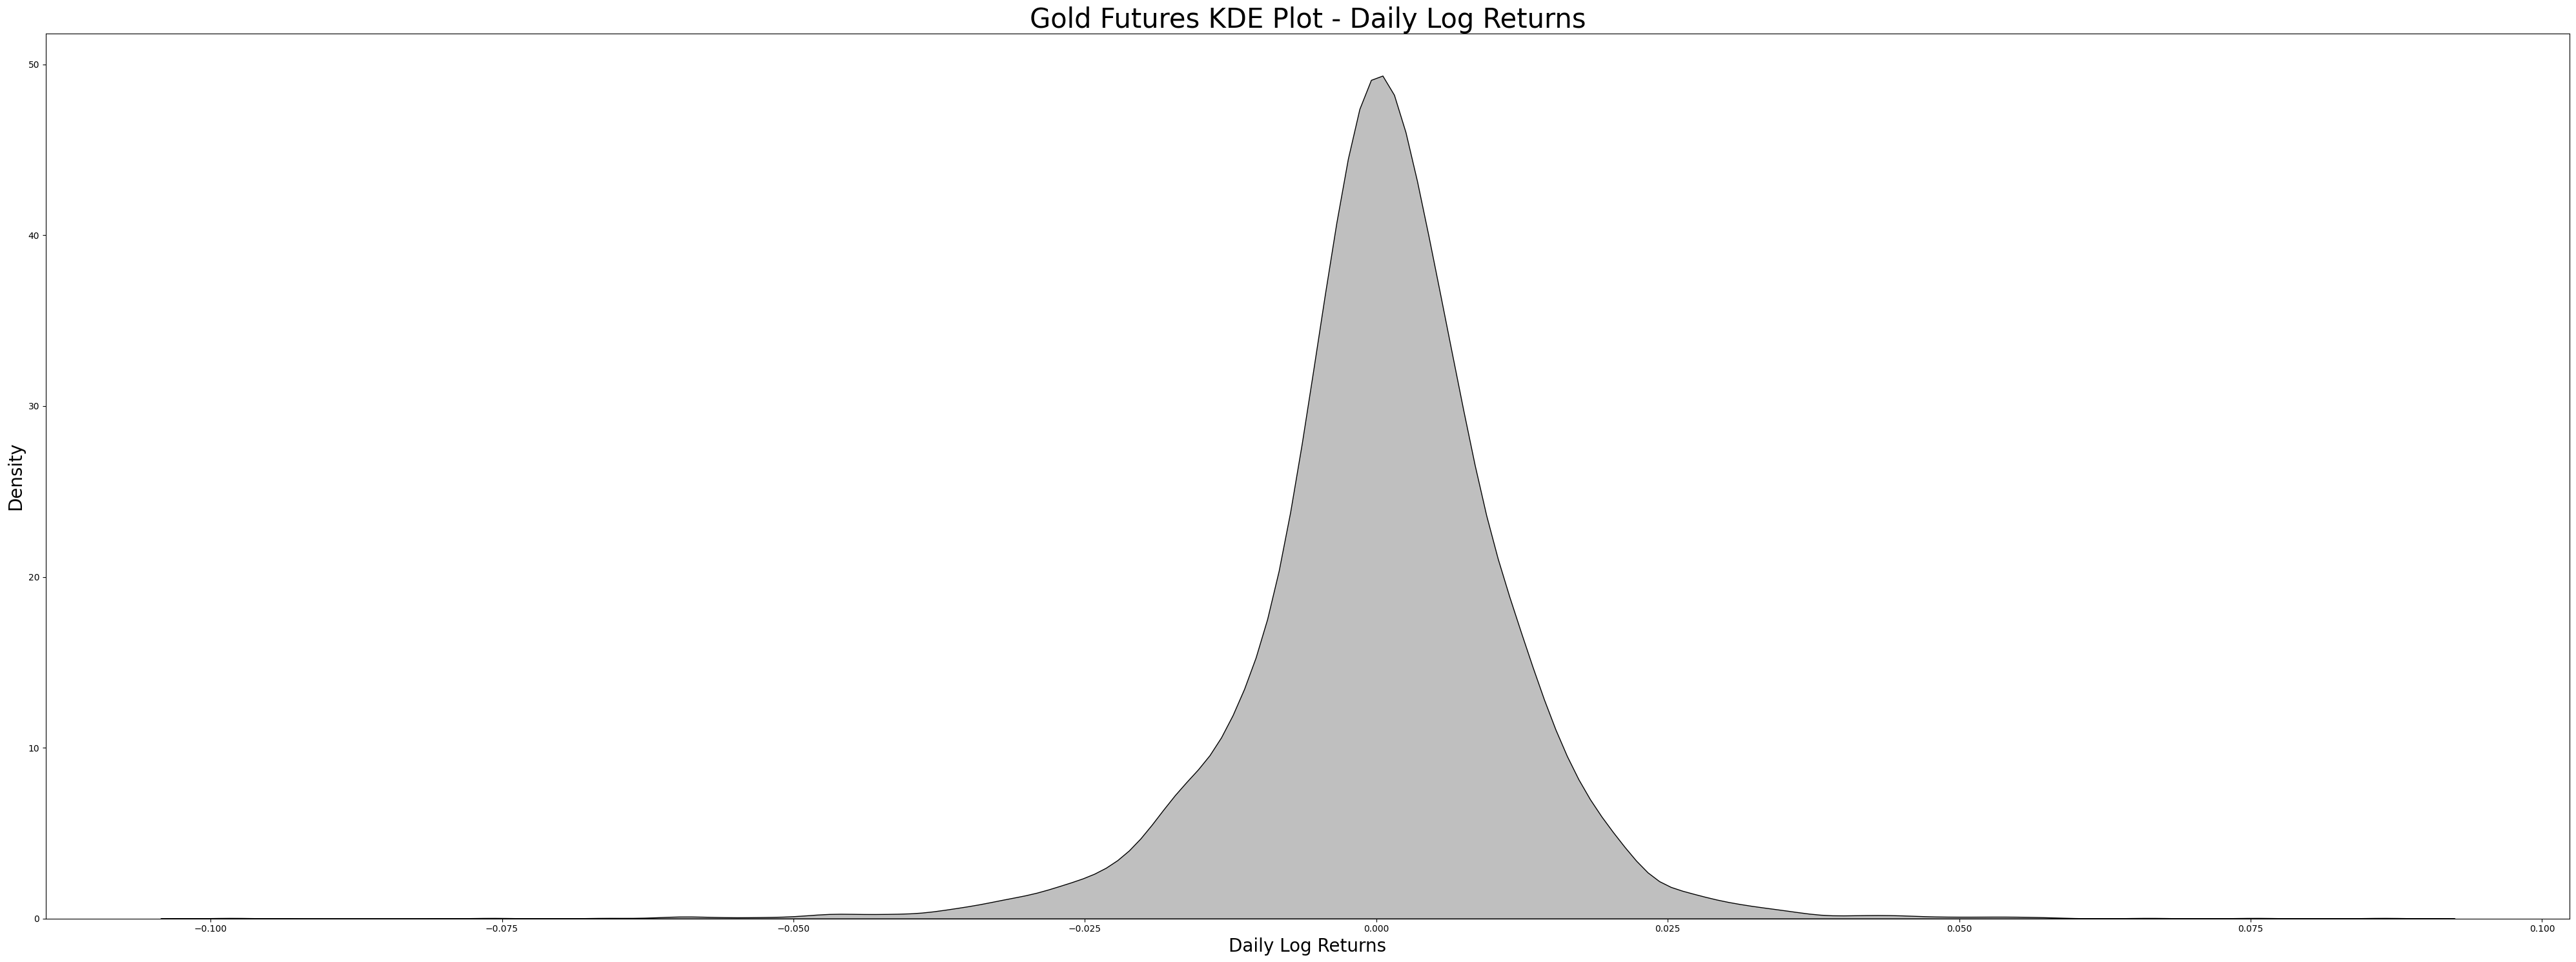

STATISTICAL TESTS
Following statistical tests are being conducted on the data to better understand the distribution guide our way-forward:
      1. Kurtosis - to test for tail thickness
      2. Skewness - to test for tail assymetry
      3. Normality Rejection - Jarque–Bera (moment-based) and Anderson-Darling (tail-sensitive) - to support rejection of Gaussian MC
      4. Volatility Clustering - ACF and Ljung-Box on squared returns - to support development of features for XGBoost model

1. Kurtosis Test

Kurtosis = 5.14.
Outcome:
    Distribution is Leptokurtic (fat tails) - meaning there is a higher probability of extreme outcomes and volatility clustering is likely present. Thus, our project will adopt the below approach:
    1. Monte-Carlo: During implementation, we will incorporate fat-tailed innovations (e.g., Student-t) to preserve tail behavior.
    2. XGBoost: No winsorization of extremes. Outliers shall be retained as-is as they represent genuine market behavior rather than p

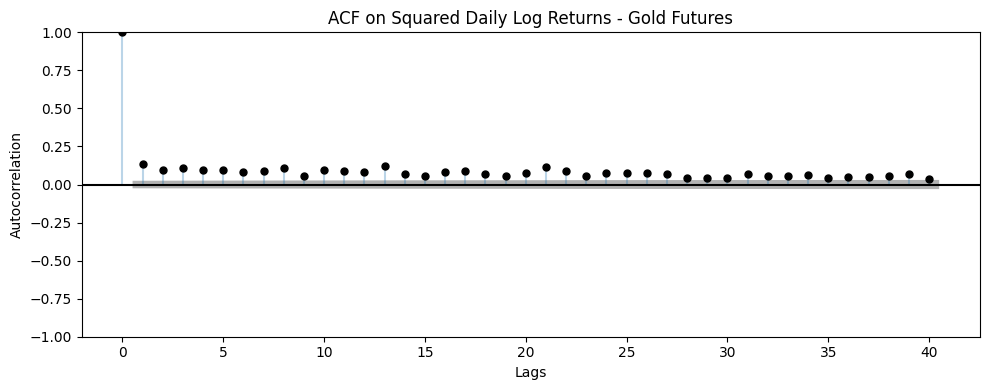

4.2. Ljung-Box on squared log returns
LB Test:
        lb_stat      lb_pvalue
10   601.575222  8.095121e-123
20  1019.233950  3.085422e-203
40  1538.148177  5.682211e-297


In [6]:
# View summary statistics
print('SUMMARY STATISTICS')
print(f'Gold Futures dataset - Top 5 and Bottom 5 rows:\n{goldfutures_cudf.head()}\n{goldfutures_cudf.tail()}')
print(f'Gold Futures summary statistics:\n{goldfutures_cudf.describe()}')
print('========================================================')
print('EDA')
# Plot Data
fig, ax = plt.subplots(figsize=(40, 15), dpi=100)
print(f'Date datatype:{goldfutures_cudf['date'].dtype}')
goldfutures_cudf['date'] = cudf.to_datetime(goldfutures_cudf['date'])
ax.plot(goldfutures_cudf['date'], goldfutures_cudf['daily_log_closing_value'], '--', color='black', marker='o')
ax.set_title('Gold Futures Data Plot - Daily Log Returns', fontsize=30)
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Daily Log Returns', fontsize=20)
ax.set_xlim(goldfutures_cudf['date'].min(), goldfutures_cudf['date'].max())
ax.xaxis.set_major_locator(mdates.MonthLocator([1, 4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()
fig_kde, ax_kde = plt.subplots(figsize=(40, 15), dpi=100)
sns.kdeplot(goldfutures_cudf['daily_log_closing_value'].to_numpy(), bw_adjust=1, bw_method='silverman', color='black', fill=True, ax=ax_kde)
ax_kde.set_title('Gold Futures KDE Plot - Daily Log Returns', fontsize=30)
ax_kde.set_xlabel('Daily Log Returns', fontsize=20)
ax_kde.set_ylabel('Density', fontsize=20)
fig_kde.tight_layout()
plt.show()
print('========================================================')
print('STATISTICAL TESTS')
# Tests
print(f"""Following statistical tests are being conducted on the data to better understand the distribution guide our way-forward:
      1. Kurtosis - to test for tail thickness
      2. Skewness - to test for tail assymetry
      3. Normality Rejection - Jarque–Bera (moment-based) and Anderson-Darling (tail-sensitive) - to support rejection of Gaussian MC
      4. Volatility Clustering - ACF and Ljung-Box on squared returns - to support development of features for XGBoost model
""")
# 1. Kurtosis Test
print('1. Kurtosis Test')
ret_log = goldfutures_cudf['daily_log_closing_value'].to_numpy()
goldfutures_kurt = kurtosis(
    ret_log,
    fisher=True, # capturing excess kurtosis = pearson kurtosis - 3
    bias=False # apply bias correction on estimator
)
if goldfutures_kurt == 0:
    print(f'Kurtosis = {goldfutures_kurt:.2f}. Outcome - Normal: Tail behavior is consistent with normality')
elif goldfutures_kurt > 0:
    print(f"""
Kurtosis = {goldfutures_kurt:.2f}.
Outcome:
    Distribution is Leptokurtic (fat tails) - meaning there is a higher probability of extreme outcomes and volatility clustering is likely present. Thus, our project will adopt the below approach:
    1. Monte-Carlo: During implementation, we will incorporate fat-tailed innovations (e.g., Student-t) to preserve tail behavior.
    2. XGBoost: No winsorization of extremes. Outliers shall be retained as-is as they represent genuine market behavior rather than pure noise.
    3. Risk Metrics: Conditional Value at Risk (CVaR) - over VaR - will be the preferred metric of choice to ensure sensitivity to tail risk.
""")
elif goldfutures_kurt < 0:
    print(f"""
Kurtosis = {goldfutures_kurt:.2f}.
Outcome:
    Distribution is Platykurtic (thin tails) - meaning there are fewer extreme events relative to a normal distribution. This suggests relatively stable return dynamics with reduced tail risk. Hence, our project will adopt the below approach:
    1. Monte-Carlo: Parametric simulations with Gaussian or mildly fat-tailed innovations will be considered.
    2. XGBoost: Limited winsorization or other outlier elimination methods shall be evaluated - depending upon the model's out-of-sample performance.
    3. Risk Metrics: While CVaR will remain available for completeness, standard deviation and Sharpe-based metrics will receive greater emphasis given the reduced tail risk profile. 
""")
x = ret_log[np.isfinite(ret_log)]
goldfutures_kurt_check = kurtosis(x, fisher=True, bias=False)
print('Kurtosis sanity check:')
if abs(goldfutures_kurt - goldfutures_kurt_check) < 1e-6:
    print('Pass')
else:
    print('Fail')
# 2. Skewness Test
print('\n2. Skewness Test')
goldfutures_skew = skew(
    ret_log,
    bias=False # apply bias correction on estimator
)
if goldfutures_skew > 0:
    print(f"""
Skewness = {goldfutures_skew:.2f}.
Outcome:
    Distribution is positively skewed (right-skewed) – indicating a heavier right tail and a higher frequency of large positive return realizations.
    This suggests upside-dominated asymmetry, although tail risk is material since kurtosis is elevated. Accordingly, the project will adopt the following approach:
    1. Monte-Carlo: Symmetric or mildly asymmetric fat-tailed innovations may be considered, subject to validation against empirical tails.
    2. XGBoost: Retain positive return extremes, as they may capture convex payoff structures or regime-driven upside events.
    3. Risk Metrics: CVaR will remain available for completeness, while performance evaluation may also consider upside-sensitive metrics where appropriate.
""")
else:
    print(f"""
Skewness = {goldfutures_skew:.2f}.
Outcome:
    Distribution is negatively skewed (left-skewed) – indicating a heavier left tail and a higher frequency of large negative returns relative to positive extremes.
    This highlights pronounced downside asymmetry and elevated crash risk. Accordingly, the project will adopt the following approach:
    1. Monte-Carlo: Consider asymmetric or skew-aware innovations (e.g., skew-t), or focus explicitly on left-tail behavior in simulations.
    2. XGBoost: Preserve negative return extremes without winsorization, and prioritize downside-sensitive features (e.g., downside volatility, drawdown-related measures).
    3. Risk Metrics: Emphasize left-tail CVaR as the primary risk metric to ensure sensitivity to downside tail risk.
""")
goldfutures_skew_check = skew(x, bias=False)
print('Skewness sanity check:')
if abs(goldfutures_skew - goldfutures_skew_check) < 1e-6:
    print('Pass')
else:
    print('Fail')
# 3. Normality Rejection Tests (Jarque-Bera and Anderson-Darling)
print('\n3. Normality Rejection Tests (Jarque-Bera and Anderson-Darling)')
print('3.1. Jarque-Bera Test: H0: Returns are normally distributed')
goldfutures_jb_stat, goldfutures_jb_p = jarque_bera(x)
alpha = 0.05
print(f'Jarque-Bera Test Results: JB-Statistic = {goldfutures_jb_stat:.2f} and P-Value = {goldfutures_jb_p}')
if goldfutures_jb_p < alpha:
    print(f"""Reject H0: Returns are not normally distributed. Accordingly, the project will adopt the following approach:
1. Monte-Carlo: Gaussian Monte-Carlo is explicitly rejected.
2. XGBoost: Extreme observations will be retained without winsorization and feature engineering will explicitly capture nonlinear and regime-dependent behavior, including rolling volatility and downside-sensitive features.
3. Risk Metrics: CVaR will be emphasized over VaR to ensure sensitivity to tail risk.
""")
else:
    print(f"""Fail to Reject H0: Returns are normally distributed. Accordingly, the project will adopt the following approach:
1. Monte-Carlo: Gaussian Monte-Carlo simulations may be used as a baseline.
2. XGBoost: Limited winsorization or robust scaling of extreme observations may be evaluated and feature engineering will emphasize mean-variance dynamics rather than tail-specific assymetries.
3. Risk Metrics: Variance-based metrics (standard deviation, Sharpe ratio) may receive greater emphasis, given the absence of strong statistical evidence of tail risk. CVaR may be used for completedness.
""")
print('3.2. Anderson-Darling Test: H0: Returns are normally distributed')
goldfutures_ad = anderson(x, dist='norm')
goldfutures_ad_stat = goldfutures_ad.statistic
goldfutures_ad_cvalue = goldfutures_ad.critical_values[2] # critical value @ 5% significance
print(f'Anderson-Darling Test Results: AD-Statistic = {goldfutures_ad_stat:.2f} and AD-Critical Value @5% Significance = {goldfutures_ad_cvalue}')
if goldfutures_ad_stat > goldfutures_ad_cvalue:
    print(f'Reject H0: Returns are not normally distributed. Project approach remains same as outlined in JB above.')
else:
    print(f'Fail to Reject H0: Returns are normally distributed. Project approach remains same as outlined in JB above.')
# 4. Volatility Clustering
print('\n4. Volatility Clustering Tests (ACF and Ljung-Box)')
print('4.1. ACF on squared log returns')
sq_ret_log = x**2
fig_acf, ax_acf = plt.subplots(figsize=(10, 4), dpi=100)
plot_acf(
    sq_ret_log,
    lags=40,
    alpha=0.05,
    ax=ax_acf
)
for line in ax_acf.lines:
    line.set_color('black')

for collections in ax_acf.collections:
    collections.set_facecolor('black')
    collections.set_alpha(0.3)

ax_acf.set_title('ACF on Squared Daily Log Returns - Gold Futures')
ax_acf.set_xlabel('Lags')
ax_acf.set_ylabel('Autocorrelation')
fig_acf.tight_layout()
plt.show()
print('4.2. Ljung-Box on squared log returns')
goldfutures_lb = acorr_ljungbox(
    sq_ret_log,
    lags=[10, 20, 40],
    return_df=True
)
print(f'LB Test:\n{goldfutures_lb}')


**Conclusion - Gold Futures (COMEX Proxy for Spot Gold)**

Statistical diagnostics indicate that Gold Futures daily log returns are distinctly non-Gaussian, exhibiting moderate but economically meaningful fat tails, mild negative skewness, and persistent—though comparatively smoother—volatility clustering. Excess kurtosis (5.14) confirms an elevated probability of extreme outcomes relative to a normal distribution, while negative skewness (-0.32) highlights asymmetric downside risk, albeit less severe than in equity indices. Normality is decisively rejected by both Jarque–Bera and Anderson–Darling tests, ruling out Gaussian assumptions for simulation-based risk modeling. Autocorrelation in squared returns, reinforced by Ljung–Box test rejections across multiple horizons, provides strong evidence of time-varying volatility dynamics. Accordingly, Gaussian Monte Carlo is inappropriate for Gold Futures, simulations must incorporate fat-tailed (and potentially skewed) innovations, extreme observations should be retained for machine learning models, volatility-aware and downside-sensitive features are emphasized in XGBoost, and CVaR is preferred over VaR to ensure adequate capture of tail risk—even in an asset traditionally perceived as a defensive or stabilizing component.

#### 2.2.4. EDA and Tests Conclusion:

*(NIFTY 50, NIFTY Bank, Gold Futures)*

Across equities and commodities, the statistical evidence consistently shows that **asset returns deviate materially from Gaussian assumptions**. All three assets exhibit fat tails, downside asymmetry, and time-varying volatility, with the strength of these effects differing by asset class. NIFTY Bank displays the most severe tail and crash risk, NIFTY 50 shows structurally non-Gaussian behavior typical of broad equity markets, and Gold—while comparatively more stable—still exhibits meaningful departures from normality. These findings directly shape the modeling strategy for this project.

##### Implications for Monte-Carlo Simulation
- **Gaussian Monte-Carlo is rejected as a standalone approach** across all assets, as it fails to capture observed tail risk and volatility dynamics.
- Simulations will incorporate **fat-tailed innovations** (e.g., Student-t), with flexibility to allow for **asymmetry where downside risk is pronounced**, particularly for equity indices.
- Monte-Carlo outputs will be interpreted as **risk-scenario generators rather than precise distributional forecasts**, recognizing regime dependence and structural breaks in financial markets.
- Gold simulations, while still non-Gaussian, will reflect **relatively lower tail severity**, supporting its role as a stabilizing portfolio component without assuming normality.

##### Implications for XGBoost and Machine Learning
- **Extreme observations are retained** across all assets; no winsorization or truncation is applied, as extremes represent genuine market behavior.
- Feature engineering emphasizes **volatility-aware and downside-sensitive variables**, including rolling volatility, lagged returns, and drawdown-related measures.
- Volatility clustering evidenced by ACF and Ljung-Box tests justifies the use of **lagged and rolling features** to capture persistence and regime effects.
- XGBoost is positioned as a **complementary, data-driven alternative** to simulation models, particularly suited to capturing nonlinearities and cross-asset differences in risk behavior.

##### Implications for Risk Metrics and Portfolio Evaluation
- **CVaR is prioritized over VaR** as the primary risk metric across all assets due to its sensitivity to tail losses.
- Downside-focused risk evaluation is emphasized, especially for NIFTY Bank, where crash risk and tail dependence are structurally higher.
- Risk comparisons across assets explicitly account for **differences in tail behavior**, rather than relying solely on volatility or standard deviation.
- Gold’s contribution to portfolios is assessed not by assumed normality, but by its **empirically observed tail characteristics and volatility persistence**, reinforcing its diversification role on a risk-adjusted basis.

##### Overall Project Positioning
Taken together, the diagnostics support a **hybrid risk-modeling framework**:  
- **Non-Gaussian Monte-Carlo** for scenario-based risk exploration,  
- **XGBoost** for capturing nonlinear, volatility-driven dynamics, and  
- **CVaR-focused evaluation** for consistent, downside-aware risk assessment.

This integrated approach ensures that portfolio risk is evaluated using models and metrics that are **aligned with observed market behavior**, rather than imposed theoretical assumptions.

## **Section 3: Feature Engineering for XGBoost**

Based on the findings from section 2, this section focusses on undertaking feature engineering - across all 3 datasets - to generate analysis-ready files. This section starts by outlining guiding principles for identification of the engineered features and then proceeds to implement the same.

### XGBoost Feature Engineering Guiding Principles

**Features Identified Based on Statistical Tests:**

 - **Return-based Features:** Statistical diagnosis suggest Non-Gaussian returns and volatility clustering meaning that simple linear/constant-variance assumptions are insufficient. Based on this finding, return-based features need to include lagged and rolling features to capture persistence and regime shifts and thus, the following features will be implemented:
     - Lagged Returns:
        - Lag 1: $r_{t-1}$
        - Lag 2: $r_{t-2}$
        - Lag 3: $r_{t-3}$
        - Lag 4: $r_{t-4}$
        - Lag 5: $r_{t-5}$
        - Lag 10: $r_{t-10}$
        - Lag 20: $r_{t-20}$
     - Rolling Mean Returns:
        - Rolling Mean of Returns over:
            - 5 days
            - 10 days
            - 20 days
     - Return Momentum:
        - Cumulative Returns over:
            - 5 days
            - 10 days
            - 20 days
     - Volatility Persistence Proxies:
        - Squared Returns: $r²_t$
        - Lagged Squared Returns:
            - Squared Lag 1: $r²_{t-1}$
            - Squared Lag 5: $r²_{t-5}$
            - Squared Lag 10: $r²_{t-10}$
        - Rolling Mean of Squared Returns over:
            - 5 days
            - 10 days
 - **Volatility Clustering Features:** Statistical diagnosis - directly motivated by ACF and Ljung-Box tests - suggest presence of time-varying volatility (with strength varying across the 3 asset classes). Hence, the following features will be implemented (with strong focus on volatility ratios - which will help XGBoost identify and handle volatility regime shifts):
     - Rolling Volatility:
        - Rolling standard deviation of returns over:
            - 5 days
            - 10 days
            - 20 days
            - 40 days
            - 60 days
     - Lagged Volatility (over 20 days):
        - Lag 1: $\sigma_{20,t-1}$
        - Lag 5: $\sigma_{20,t-5}$
        - Lag 10: $\sigma_{20,t-10}$
     - Volatility Ratios (for Regime Detection):
        - Short v/s Medium (near-term stress): $\sigma_{5,t} / \sigma_{20,t}$
        - Medium v/s Long (regime shift): $\sigma_{20,t} / \sigma_{60,t}$
 - **Downside Sensitive Features:** Statistical diagnosis identified negative skew across all 3 asset classes. This explicilty warrants the presence of dedicated downside sensitive features for XGBoost to be correctly modelled. Hence, the following features will be implemented:
     - Negative Return Indicators:
        - Binary Downside Flag: $I(r_t < 0)$
        - Severe Downside Flag: $I(r_t < Q_{0.05,t}^{(20)})$ where $Q_{0.05,t}^{(20)}$ is the 0.05 (5%) rolling quantile over a 20-day window.
     - Downside Volatility:
        - Rolling downside standard deviation (returns < 0) over:
            - 10 days
            - 20 days
     - Rolling Drawdowns:
        - Maximum drawdown over:
            - 10 days
            - 20 days
            - 60 days
 - **Tail-Risk Proxies:** With the statistical diagnosis credibly establishing that all 3 datasets are Leptokurtic, it is imperative for the final dataset to have features that can allow XGBoost to learn tail dynamics indirectly. Hence, the following features will be implemented:
     - Rolling Quantiles:
        - 1% rolling quantile (20-day window)
        - 5% rolling quantile (20-day window)
     - Extreme Move Indicators:
        - Absolute Return Percentile: $I(|r_t| > Q_{0.95,t}^{(20)}(|r|))$ where $Q_{0.95,t}^{(20)}(|r|)$ is the 0.95 (95%) rolling quantile over a 20-day window.
     - Volatility Adjusted Returns:
        - Standardized Return: $r_t / \sigma_{20}$

 **Features Identified to Boost Model Performance:**
 - **Regime Identification Features:** XGBoost performs best when regimes are learned, not imposed. Hence, the following features will be implemented:
     - *Volatility Regime Flags:*
        - High volatility regime: $\sigma_{20} > rolling median(\sigma_{20})$
        - Stress regime: $\sigma_{5} > \sigma_{20} AND r_t < 0$
     - *Trend + Volatility Interaction:*
        - Return x Volatility: $r_t * \sigma_{20}$
        - Downside x Volatility: $min(r_t, 0) * \sigma_{20}$
 - **Calendar Features:** While these are not core drivers, they will provide critical controls to the model and hence, the following features will be implemented:
     - *Day-of-the-week: One-hot encoded*
     - *Separate month identifier column*
     - *End-of-month flag*

In total, 47 features will be engineered for the XGBoost model - which is a reasonable count for XGBoost given the long daily history and the need to capture volatility regimes and tail behavior. Tree-based ensembles handle correlated predictors well, and feature importance diagnostics will be used post-fit to validate contribution and prune if needed (revised list of features shall be included (in the Appendix) - if pruning is conducted). Additionally, each feature family has been designed based on:
 - fat tails
 - negative skew
 - volatility clustering
Which have been empirically demonstrated in our statistical diagnostics.

In [31]:
# Feature engineering implementation - vertical merge to create a consolidated 3 asset master data sheet
xgb_master_data_cudf = cudf.concat([nifty50_cudf, niftybank_cudf, goldfutures_cudf])

# Comverting dataframe to CPU environment - for easier implementation
xgb_master_data_df = xgb_master_data_cudf.to_pandas()

# Implementing return-based features

# Generating lagged returns (1, 2, 3, 4, 5, 10 and 20)
xgb_master_data_df['return_lag_1'] = xgb_master_data_df['daily_log_closing_value'].shift(1)
xgb_master_data_df['return_lag_2'] = xgb_master_data_df['daily_log_closing_value'].shift(2)
xgb_master_data_df['return_lag_3'] = xgb_master_data_df['daily_log_closing_value'].shift(3)
xgb_master_data_df['return_lag_4'] = xgb_master_data_df['daily_log_closing_value'].shift(4)
xgb_master_data_df['return_lag_5'] = xgb_master_data_df['daily_log_closing_value'].shift(5)
xgb_master_data_df['return_lag_10'] = xgb_master_data_df['daily_log_closing_value'].shift(10)
xgb_master_data_df['return_lag_20'] = xgb_master_data_df['daily_log_closing_value'].shift(20)

# Generating rolling mean returns (5, 10 and 20)
xgb_master_data_df['return_ma_5'] = xgb_master_data_df['daily_log_closing_value'].rolling(5).mean()
xgb_master_data_df['return_ma_10'] = xgb_master_data_df['daily_log_closing_value'].rolling(10).mean()
xgb_master_data_df['return_ma_20'] = xgb_master_data_df['daily_log_closing_value'].rolling(20).mean()

# Generating cumulative returns (5, 10 and 20)
xgb_master_data_df['return_cumulative_5'] = xgb_master_data_df['daily_log_closing_value'].expanding(5).mean()
xgb_master_data_df['return_cumulative_10'] = xgb_master_data_df['daily_log_closing_value'].expanding(10).mean()
xgb_master_data_df['return_cumulative_20'] = xgb_master_data_df['daily_log_closing_value'].expanding(20).mean()

# Generating squared returns
xgb_master_data_df['squared_daily_log_closing_value'] = xgb_master_data_df['daily_log_closing_value'] ** 2

# Generating lagged square returns (1, 5 and 10)
xgb_master_data_df['squared_return_lag_1'] = xgb_master_data_df['squared_daily_log_closing_value'].shift(1)
xgb_master_data_df['squared_return_lag_5'] = xgb_master_data_df['squared_daily_log_closing_value'].shift(5)
xgb_master_data_df['squared_return_lag_10'] = xgb_master_data_df['squared_daily_log_closing_value'].shift(10)

# Generating rolling mean of squared returns (5 and 10)
xgb_master_data_df['squared_return_ma_5'] = xgb_master_data_df['squared_daily_log_closing_value'].rolling(5).mean()
xgb_master_data_df['squared_return_ma_5'] = xgb_master_data_df['squared_daily_log_closing_value'].rolling(10).mean()

# Implementing volatility clustering features

# Generating rolling standard deviation returns (5, 10, 20, 40 and 60)
xgb_master_data_df['return_vol_ma_5'] = xgb_master_data_df['daily_log_closing_value'].rolling(5).std()
xgb_master_data_df['return_vol_ma_10'] = xgb_master_data_df['daily_log_closing_value'].rolling(10).std()
xgb_master_data_df['return_vol_ma_20'] = xgb_master_data_df['daily_log_closing_value'].rolling(20).std()
xgb_master_data_df['return_vol_ma_40'] = xgb_master_data_df['daily_log_closing_value'].rolling(40).std()
xgb_master_data_df['return_vol_ma_60'] = xgb_master_data_df['daily_log_closing_value'].rolling(60).std()

# Generating lagged volatility (1, 5 and 10) over 20 days
xgb_master_data_df['return_vol_ma_20_lag_1'] = xgb_master_data_df['return_vol_ma_20'].shift(1)
xgb_master_data_df['return_vol_ma_20_lag_5'] = xgb_master_data_df['return_vol_ma_20'].shift(5)
xgb_master_data_df['return_vol_ma_20_lag_10'] = xgb_master_data_df['return_vol_ma_20'].shift(10)

# Generating volatility ratios
xgb_master_data_df['short_medium_lag_5_lag_20'] = xgb_master_data_df['return_vol_ma_5'] / xgb_master_data_df['return_vol_ma_20']
xgb_master_data_df['medium_long_lag_20_lag_60'] = xgb_master_data_df['return_vol_ma_20'] / xgb_master_data_df['return_vol_ma_60']

# Generating binary downside flags
log_returns_list = xgb_master_data_df['daily_log_closing_value'].to_list()
binary_flag = []
for i in range(len(log_returns_list)):
    if log_returns_list[i] < 0:
        binary_flag.append(1)
    else:
        binary_flag.append(0)

xgb_master_data_df['binary_downside_flag'] = pd.Series(binary_flag)

# Generating severe downside flags and adding rolling quantiles (5% and 1% over 20-days) for tail risk
xgb_master_data_df['return_q05_20'] = xgb_master_data_df['daily_log_closing_value'].rolling(20).quantile(0.05) # 5% rolling quantile over a 20 day period (meets the requirement of rolling quantiles for tail risk proxies)
xgb_master_data_df['return_q01_20'] = xgb_master_data_df['daily_log_closing_value'].rolling(20).quantile(0.01) # 5% rolling quantile over a 20 day period (meets the requirement of rolling quantiles for tail risk proxies)
rolling_quantile_return_5 = xgb_master_data_df['return_q05_20'].to_list()
severe_downside_flag = []
for i in range(len(rolling_quantile_return_5)):
    if log_returns_list[i] < rolling_quantile_return_5[i]:
        severe_downside_flag.append(1)
    else:
        severe_downside_flag.append(0)

xgb_master_data_df['severe_downside_flag'] = pd.Series(severe_downside_flag)

# Generating downside volatility - rolling downside standard deviation (over 10 and 20 days)
# Steps to compute rolling downside volatility:
# 1. Take last 20 daily log returns 
# 2. Identify daily log returns < 0 
# 3. Compute std deviation of the subset
log_returns_series = xgb_master_data_df['daily_log_closing_value']

def downside_vol(window: pd.Series):
    neg_ret = window[window<0]
    if neg_ret.size >= 2:
        return float(neg_ret.std(ddof=1))
    else:
        return np.nan

xgb_master_data_df['rolling_downside_stddev_10'] = log_returns_series.rolling(10).apply(downside_vol, raw=False) # raw = False since we are passing a series - set this to True if an array is to be passed.
xgb_master_data_df['rolling_downside_stddev_20'] = log_returns_series.rolling(20).apply(downside_vol, raw=False) # raw = False since we are passing a series - set this to True if an array is to be passed.

# Generating rolling max drawdown (largest peak to trough %age loss) over 10, 20 and 60 days
# Steps to compute max drawdown
# 1. Build an array consisting of cumulative sum values of the log returns
# 2. Take exp of cumulative sum of log returns array to get an array comprising of simple return index (simple return index = 1 + daily %age change) values
# 3. Take the cumulative maximum of the array above - this will be the peak 
# 4. Take %age change of each value (in the simple return index array) w.r.t the peak computed above to create the drawdown series 
# 5. Since the drawdown series will comprise of -ve values, we will take the min of the series (maximum absolute figure) and return the same
def max_drawdown(window: pd.Series):
    cum_log_array = window.cumsum()
    cum_simple_array = np.exp(cum_log_array)
    peak = cum_simple_array.cummax()
    drawdowns = cum_simple_array / peak - 1
    value = drawdowns.min()
    return value

xgb_master_data_df['rolling_max_drawdown_10'] = log_returns_series.rolling(10).apply(max_drawdown, raw=False) # raw = False since we are passing a series - set this to True if an array is to be passed.
xgb_master_data_df['rolling_max_drawdown_20'] = log_returns_series.rolling(20).apply(max_drawdown, raw=False) # raw = False since we are passing a series - set this to True if an array is to be passed.
xgb_master_data_df['rolling_max_drawdown_60'] = log_returns_series.rolling(60).apply(max_drawdown, raw=False) # raw = False since we are passing a series - set this to True if an array is to be passed.

# Generating tail risk proxies
log_returns_series_abs = xgb_master_data_df['daily_log_closing_value'].abs()
return_q95_20 = log_returns_series_abs.rolling(20).quantile(0.95) # 95% rolling quantile on absolute log returns - over 20 day window
xgb_master_data_df['abs_return_percentile_indicator'] = (log_returns_series_abs > return_q95_20).astype('int')

print(f'Feature engineered master data:\n{xgb_master_data_df.head()}')
xgb_master_data_df.to_csv(xgb_master_data)
print(f'Loaded {len(xgb_master_data_df)} records to csv.')

Feature engineered master data:
   SNo.       date  closing_value  daily_closing_pct_change  \
0     1 2001-01-02         1271.8                  0.013952   
1     2 2001-01-03         1291.2                  0.015254   
2     3 2001-01-04         1307.6                  0.012701   
3     4 2001-01-05         1327.2                  0.014989   
4     5 2001-01-08         1309.2                 -0.013562   

   daily_log_closing_value  instrument_token trading_symbol exhange_name  \
0                 0.013856          256265.0       NIFTY 50         None   
1                 0.015139          256265.0       NIFTY 50         None   
2                 0.012621          256265.0       NIFTY 50         None   
3                 0.014878          256265.0       NIFTY 50         None   
4                -0.013655          256265.0       NIFTY 50         None   

   return_lag_1  return_lag_2  ...  binary_downside_flag  return_q05_20  \
0           NaN           NaN  ...                     0 